In [19]:
import torch
import torch.nn as nn
from torch.nn.utils.parametrizations import weight_norm

class CNNPredictor(nn.Module):
    def __init__(self, num_shops, seq_length, pred_length):
        super(CNNPredictor, self).__init__()
        self.num_shops = num_shops
        self.pred_length = pred_length
        
        # CNN layers
        self.conv1 = nn.Conv1d(num_shops, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        
        # Pooling and activation
        self.pool = nn.MaxPool1d(2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        

        self.fc_input_dim = 256 * (seq_length // 8)
        
        self.fc1 = nn.Linear(self.fc_input_dim, 512)
        self.fc2 = nn.Linear(512, num_shops * pred_length)
        
    def forward(self, x):
        # x shape: [batch_size, num_shops, seq_length]
        batch_size = x.size(0)
        
        # CNN layers
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        
        # Reshape for fully connected layers
        x = x.view(batch_size, -1)
        
        # Fully connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        # Reshape output
        x = x.view(batch_size, self.num_shops, self.pred_length)
        return x

In [20]:
def smape(actual, predicted):
    numerator = np.abs(predicted - actual)
    denominator = (np.abs(actual) + np.abs(predicted)) / 2.0

    valid_mask = (denominator != 0)
    smape_val = 100.0 * np.mean((numerator[valid_mask] / denominator[valid_mask]))
    return smape_val


Sales matrix shape: (46, 34)
Train data shape: (46, 26)
Val data shape: (46, 4)
Test data shape: (46, 4)
Train sequences shape: (11, 46, 12)
Train targets shape: (11, 46, 4)
Val history shape: (46, 16)
Val sequences shape: (1, 46, 12)
Val targets shape: (1, 46, 4)
Test history shape: (46, 8)
Test sequences before reshape: (46, 8)
Test sequences after reshape: (1, 46, 8)
Epoch 1/100:
Training Loss: 0.1006
Validation Loss: 0.0375
Epoch 2/100:
Training Loss: 0.0896
Validation Loss: 0.0328
Epoch 3/100:
Training Loss: 0.0728
Validation Loss: 0.0273
Epoch 4/100:
Training Loss: 0.0536
Validation Loss: 0.0251
Epoch 5/100:
Training Loss: 0.0389
Validation Loss: 0.0290
Epoch 6/100:
Training Loss: 0.0460
Validation Loss: 0.0239
Epoch 7/100:
Training Loss: 0.0342
Validation Loss: 0.0202
Epoch 8/100:
Training Loss: 0.0266
Validation Loss: 0.0192
Epoch 9/100:
Training Loss: 0.0284
Validation Loss: 0.0190
Epoch 10/100:
Training Loss: 0.0304
Validation Loss: 0.0187
Epoch 11/100:
Training Loss: 0.0308


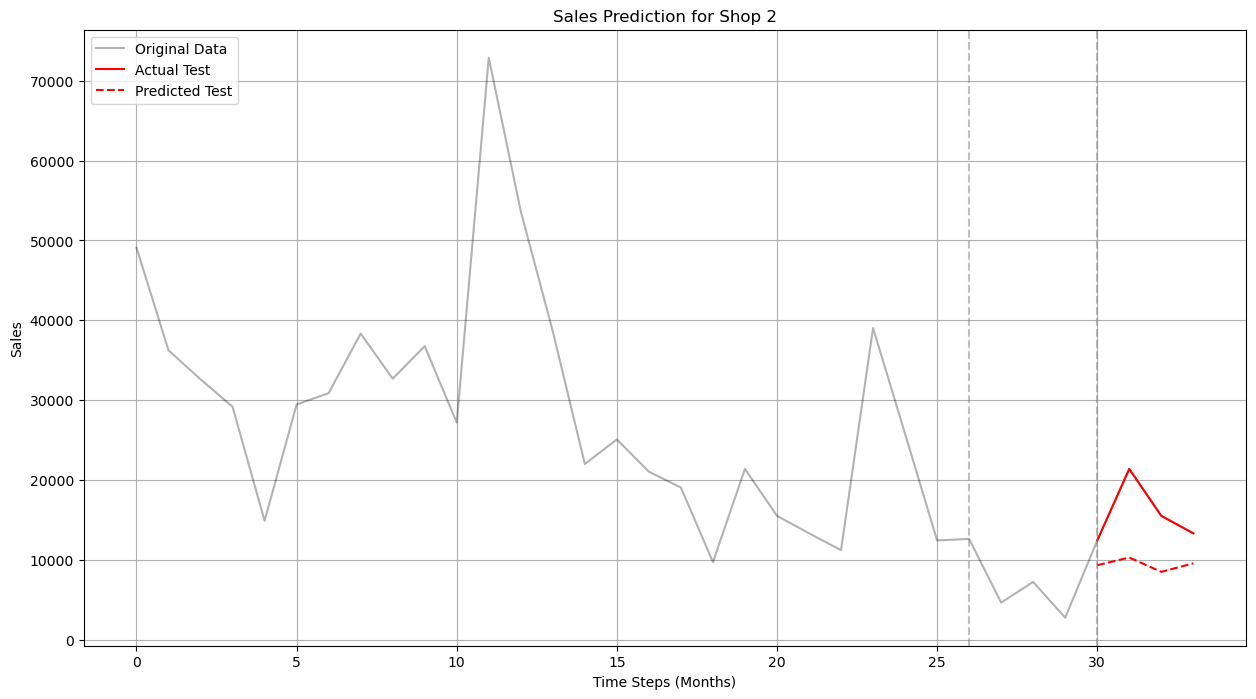


Shop 3:
MSE: 15814422.92
MAE: 3121.59


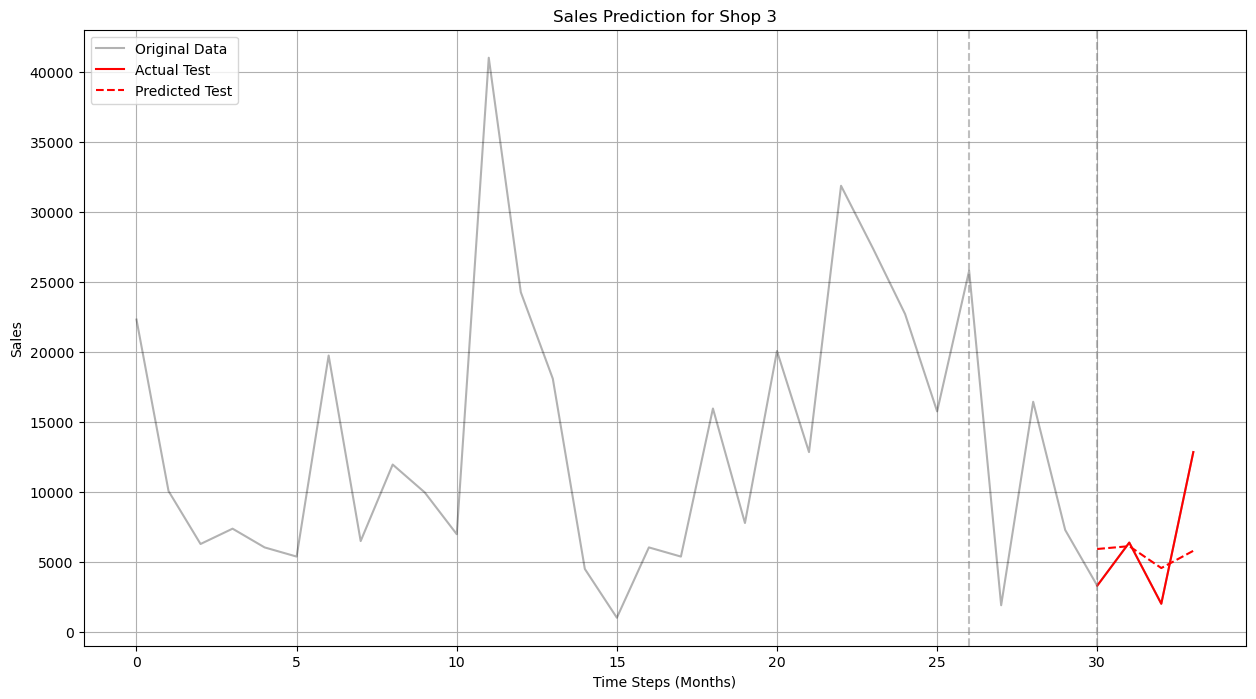


Shop 4:
MSE: 15875245.42
MAE: 3382.91


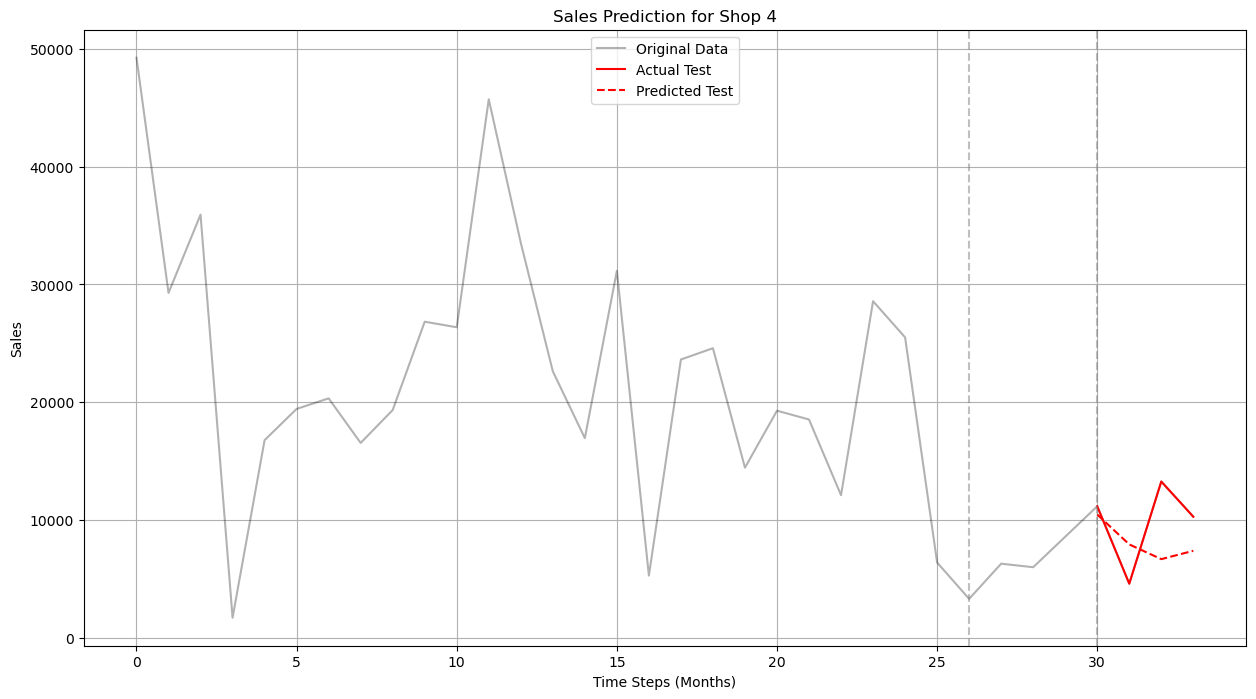


Shop 5:
MSE: 27839859.24
MAE: 5069.34


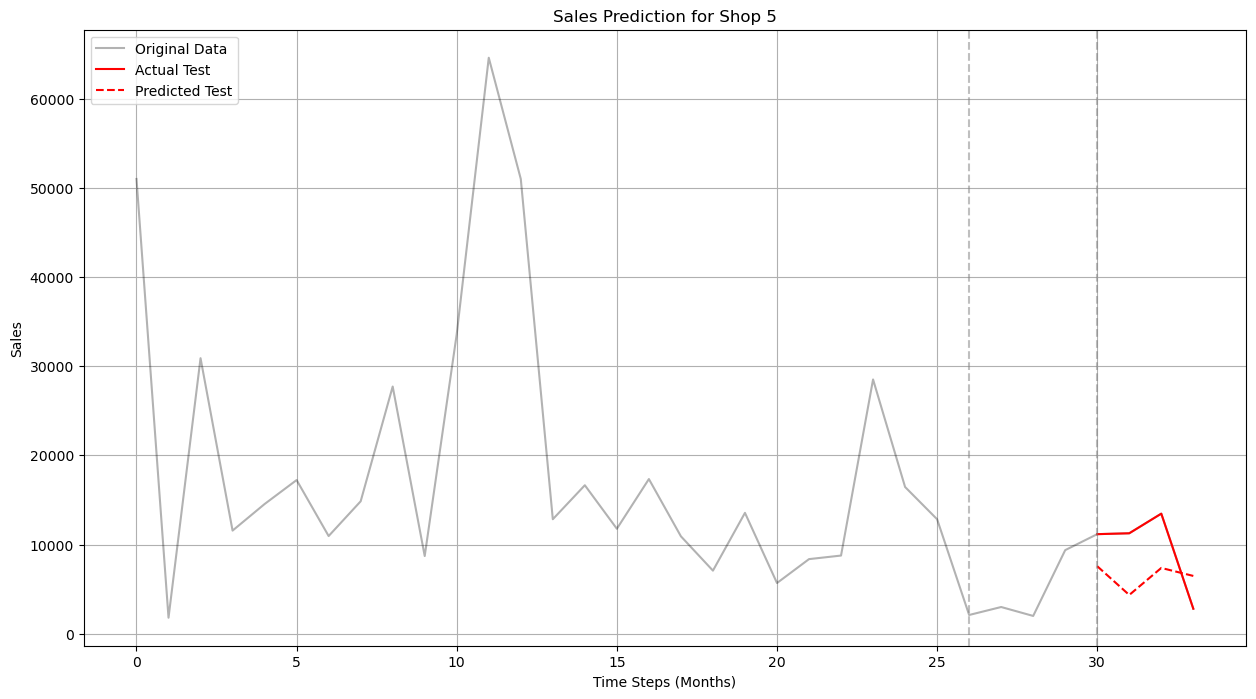


Shop 6:
MSE: 21160090.72
MAE: 4079.56


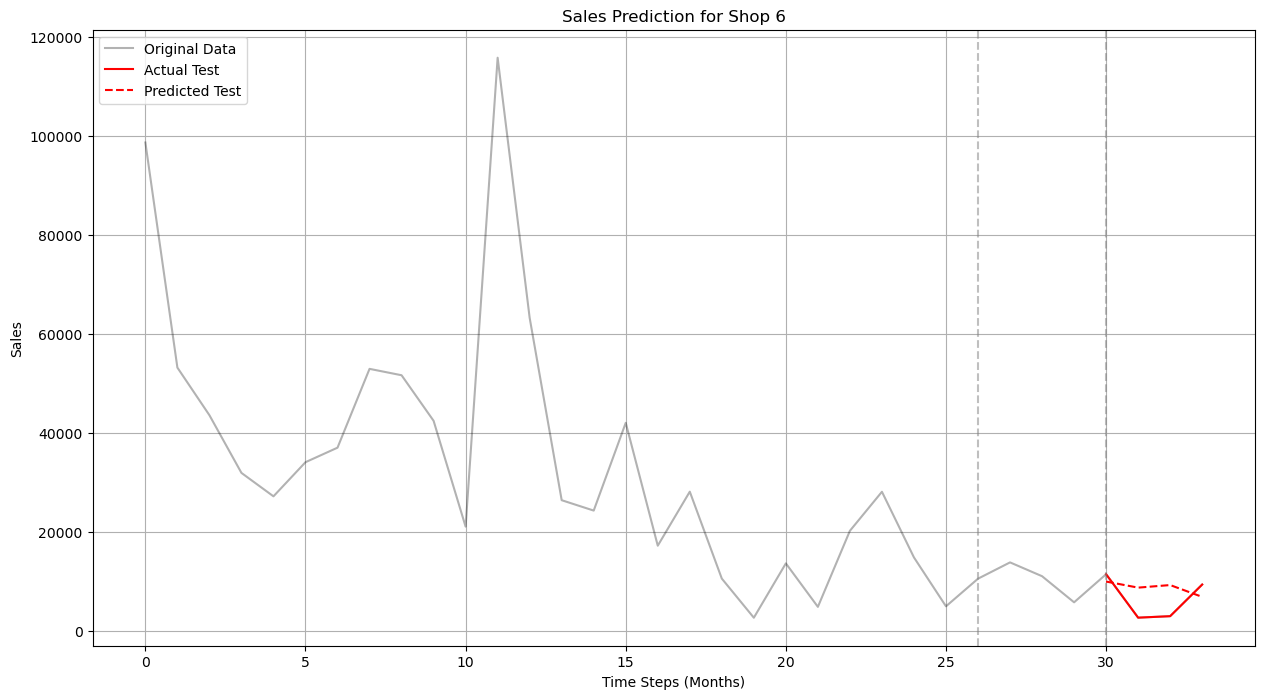


Shop 7:
MSE: 18909409.44
MAE: 3621.90


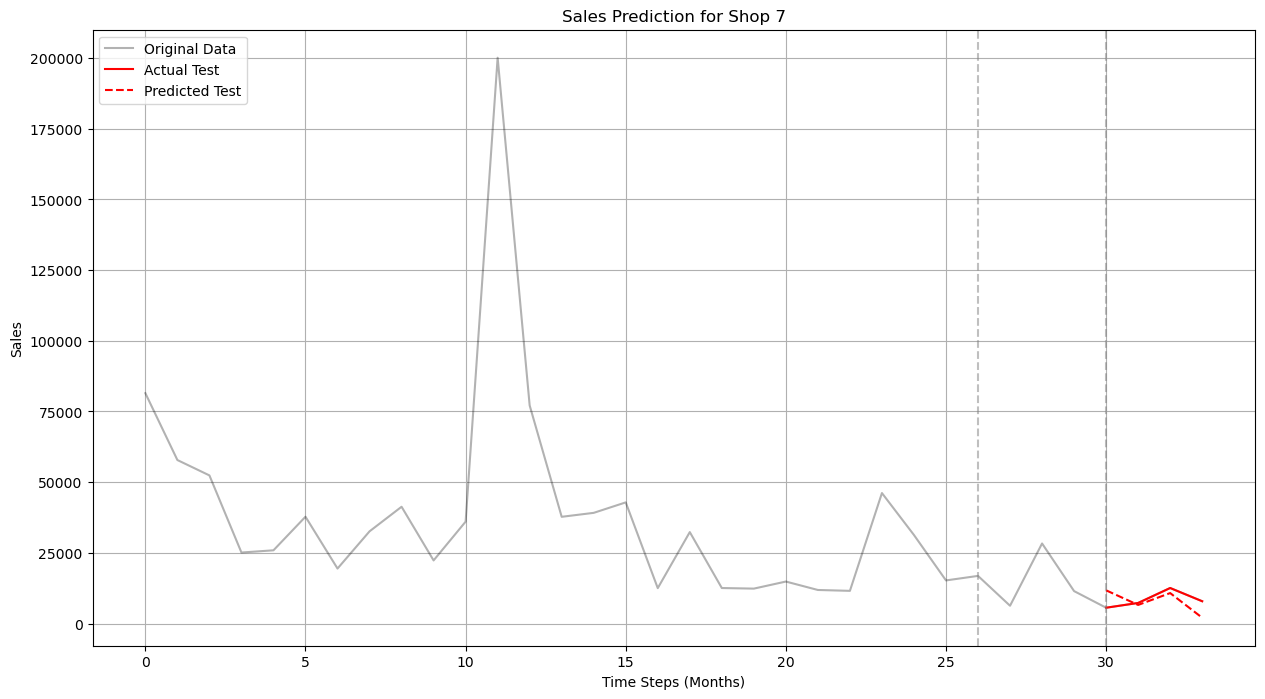


Shop 10:
MSE: 6477148.05
MAE: 2468.39


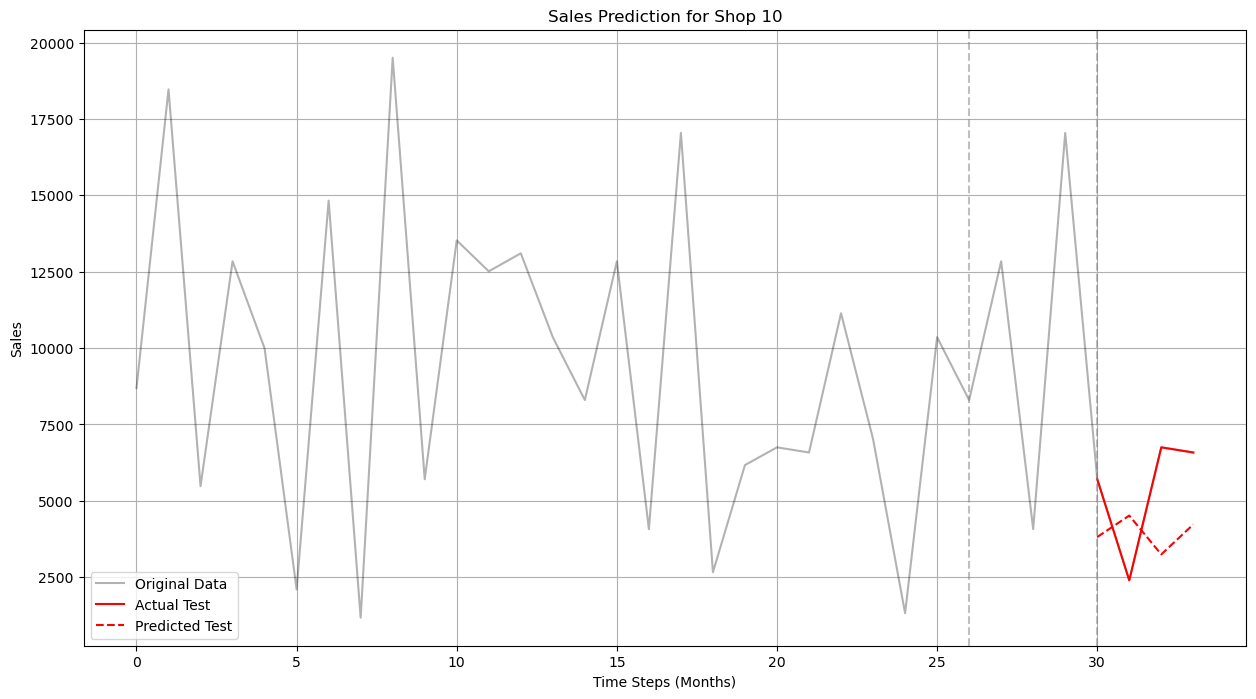


Shop 12:
MSE: 15342082.23
MAE: 3439.41


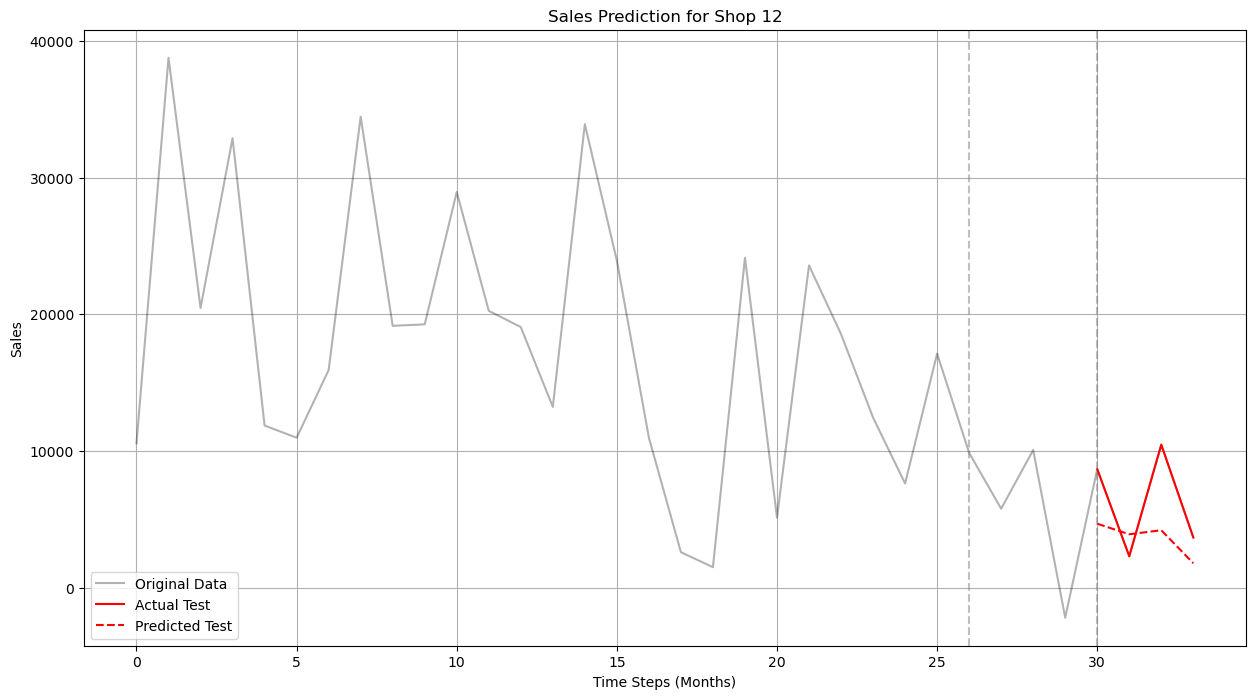


Shop 14:
MSE: 122474557.81
MAE: 10073.38


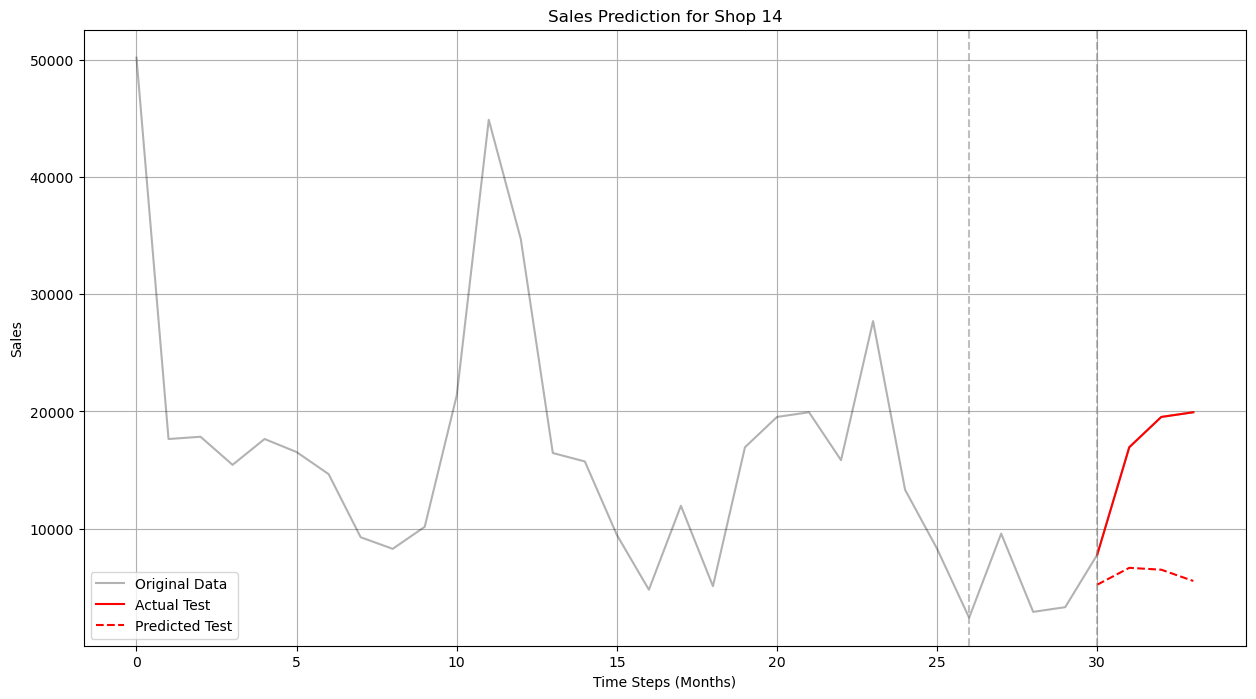


Shop 15:
MSE: 22112897.41
MAE: 4319.77


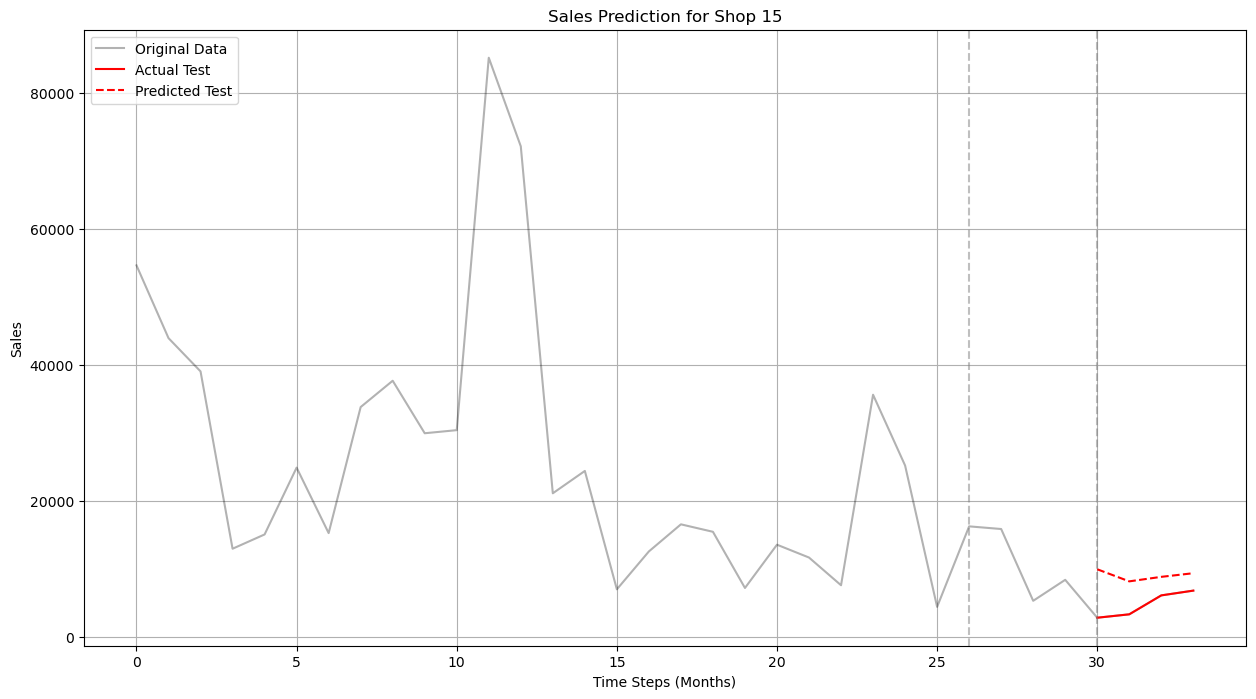


Shop 16:
MSE: 63322020.47
MAE: 6908.34


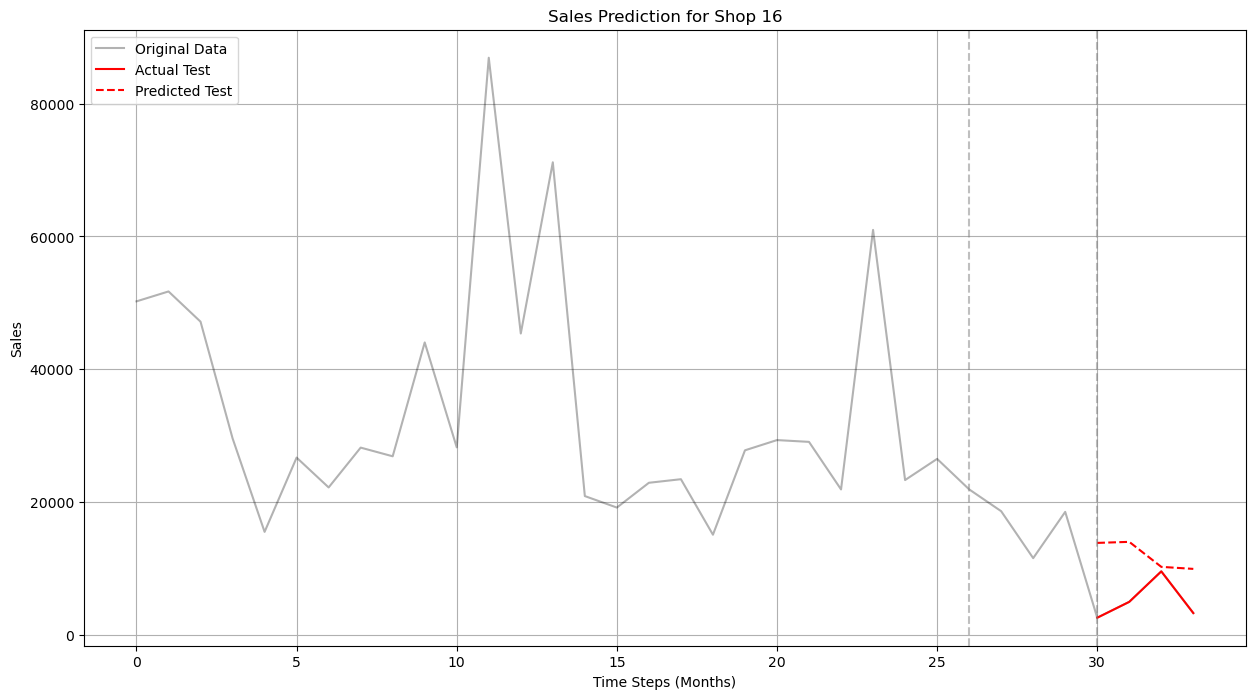


Shop 17:
MSE: 28556829.26
MAE: 4558.98


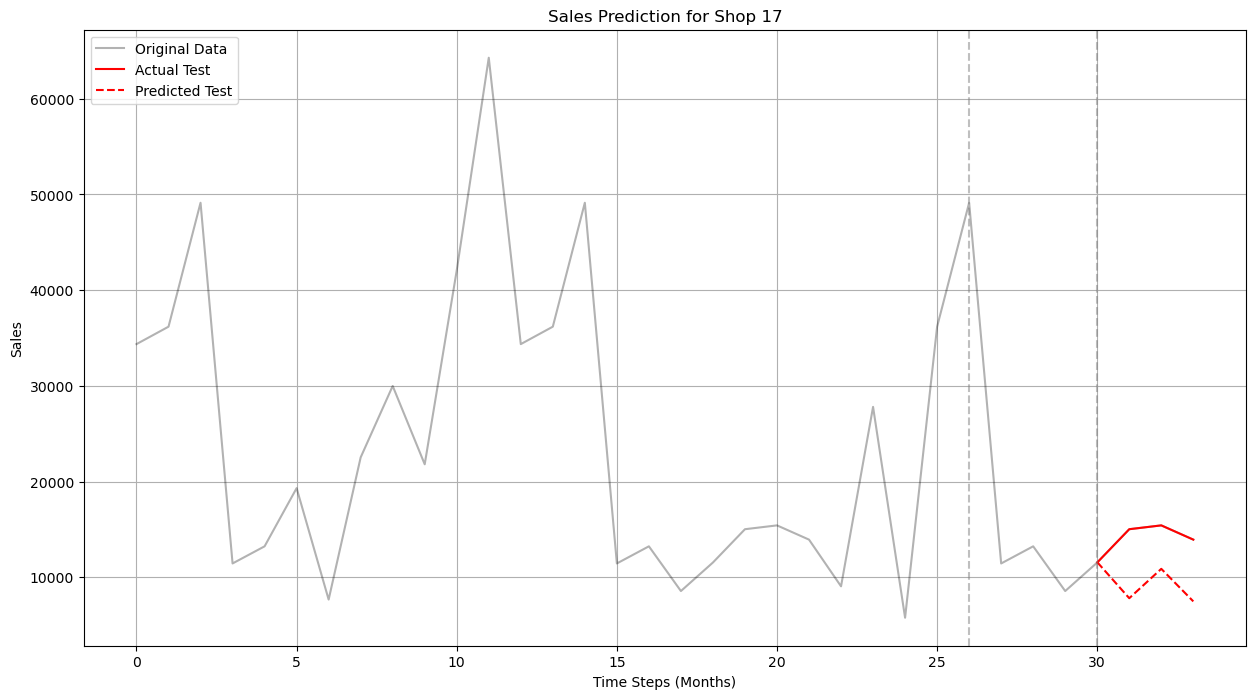


Shop 18:
MSE: 18846353.47
MAE: 3890.44


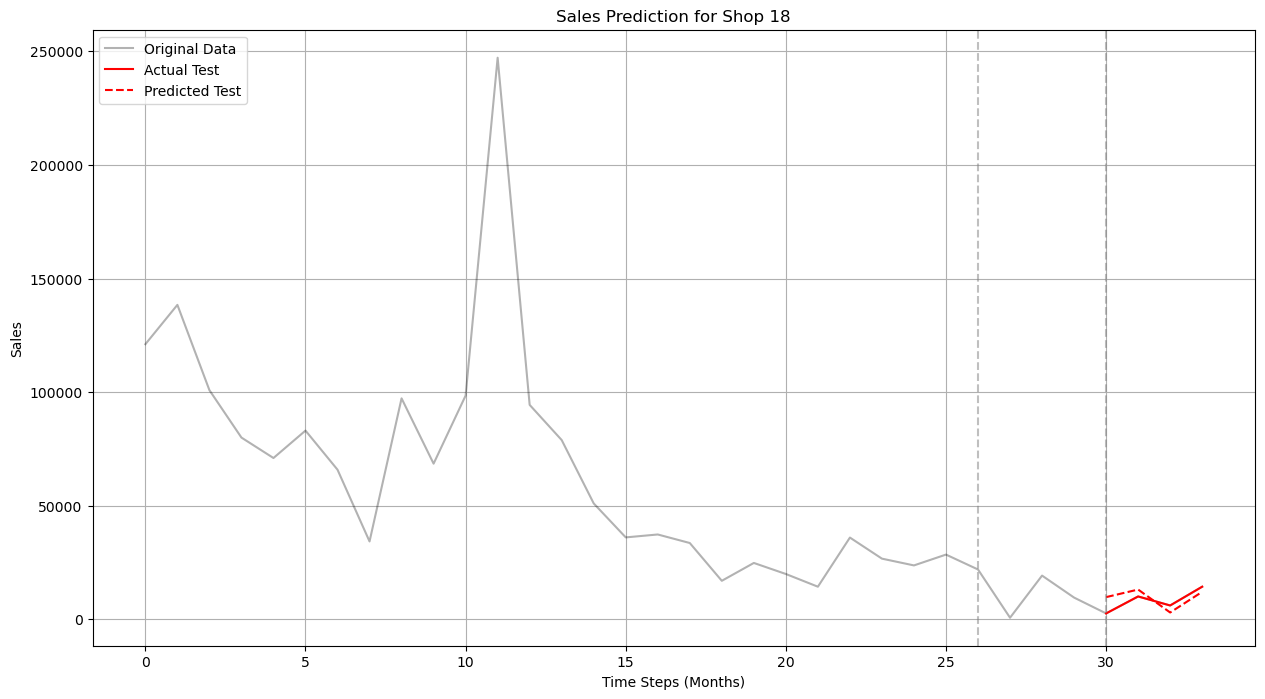


Shop 19:
MSE: 27115790.64
MAE: 4814.65


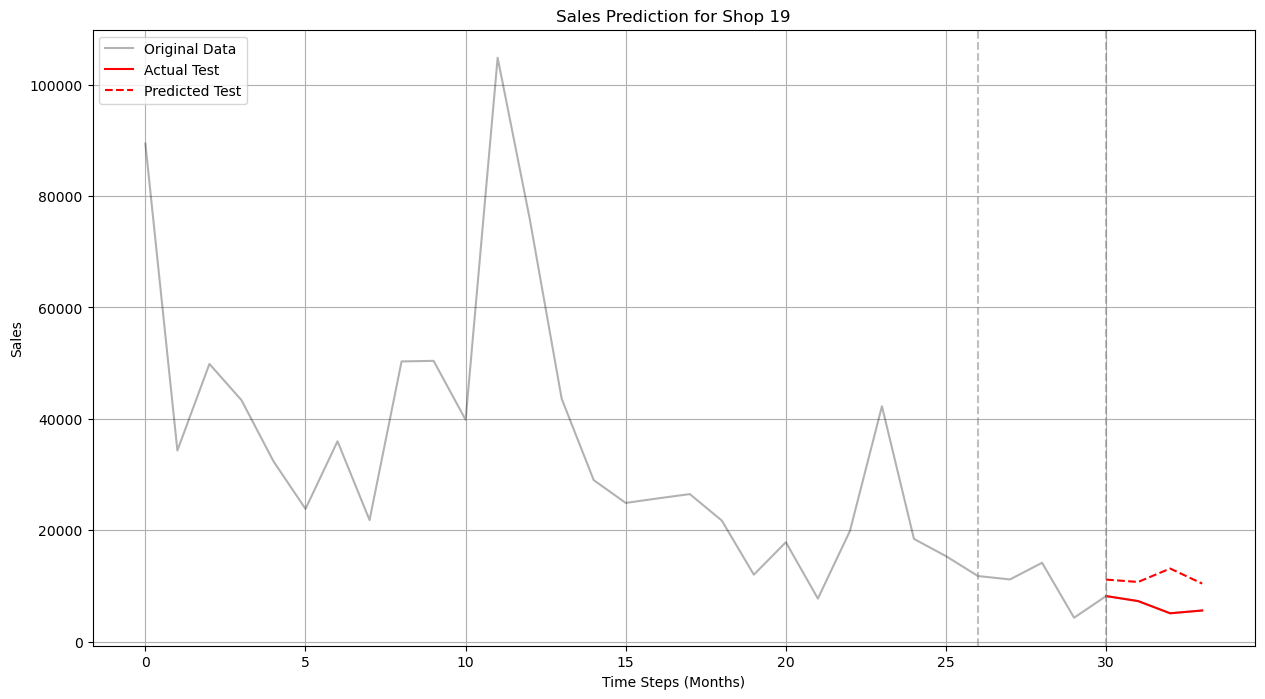


Shop 21:
MSE: 22107776.52
MAE: 4538.94


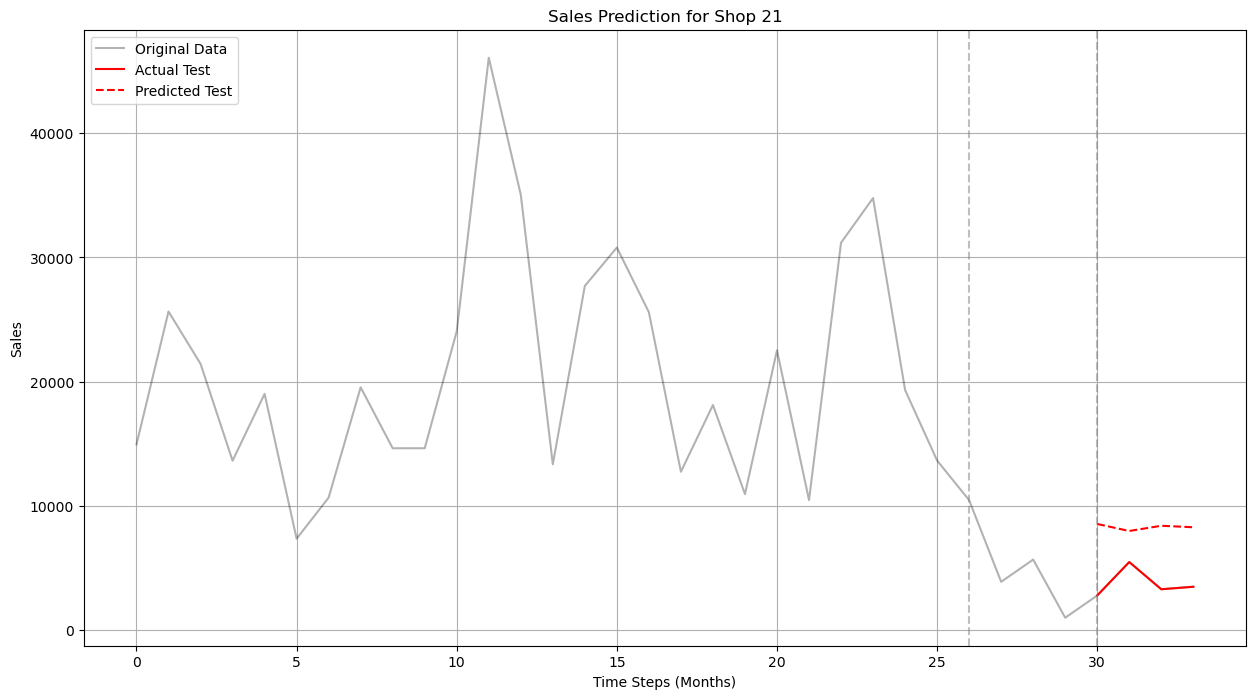


Shop 22:
MSE: 105863212.29
MAE: 9677.10


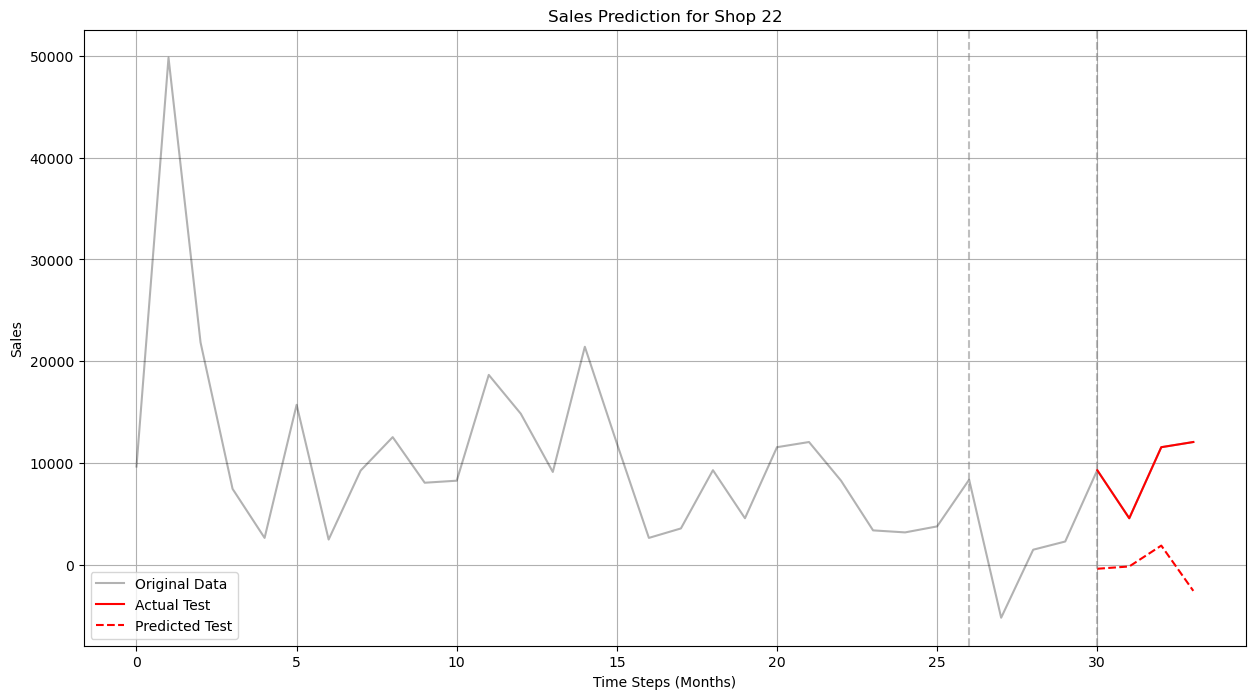


Shop 24:
MSE: 17388367.94
MAE: 3868.73


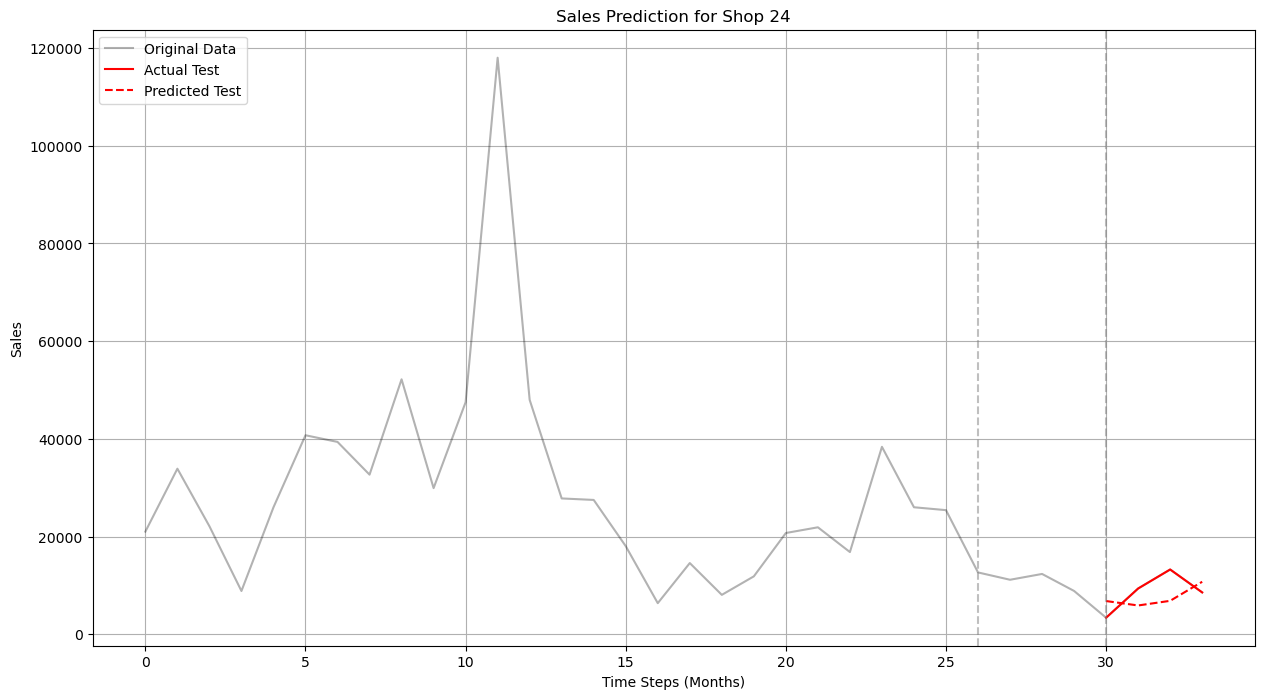


Shop 25:
MSE: 178478024.16
MAE: 12499.11


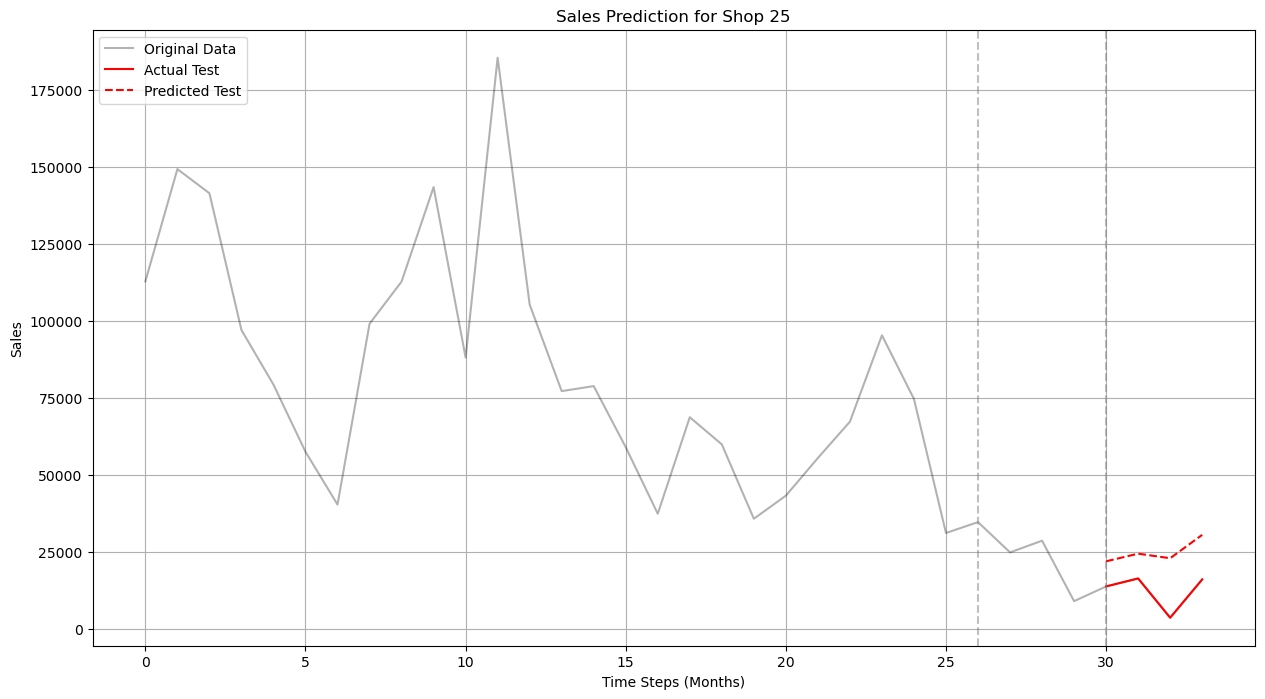


Shop 26:
MSE: 19760409.61
MAE: 3886.43


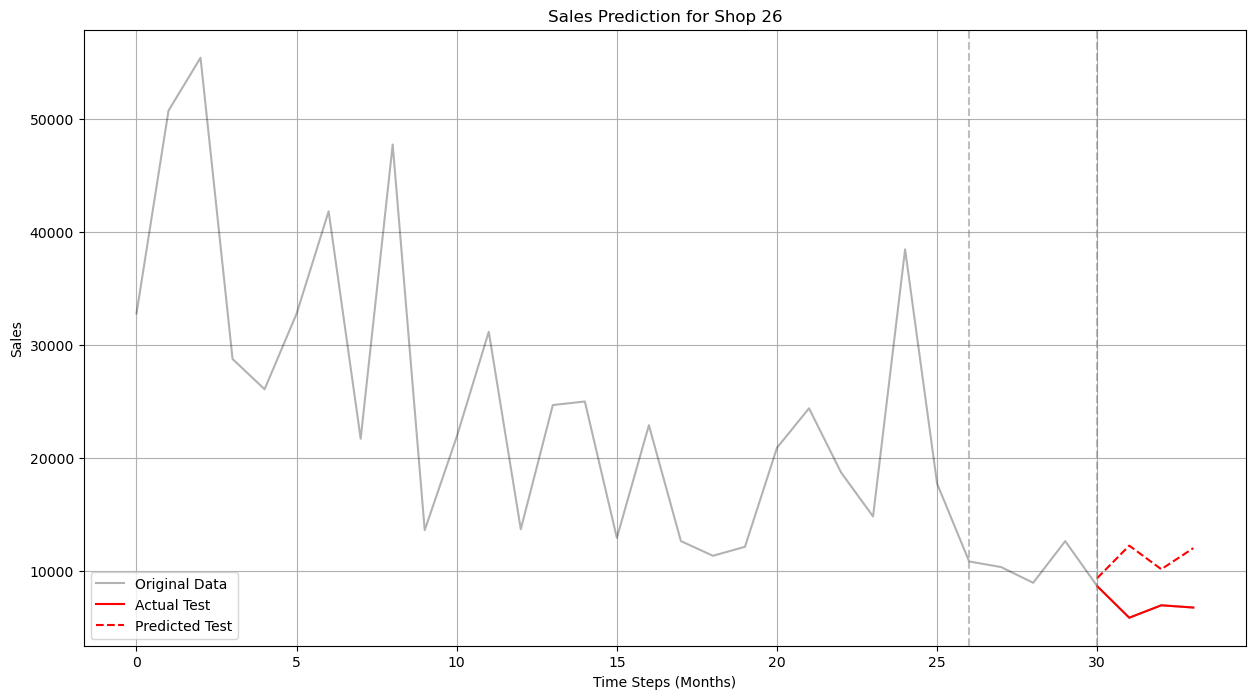


Shop 27:
MSE: 1314561863.59
MAE: 32446.76


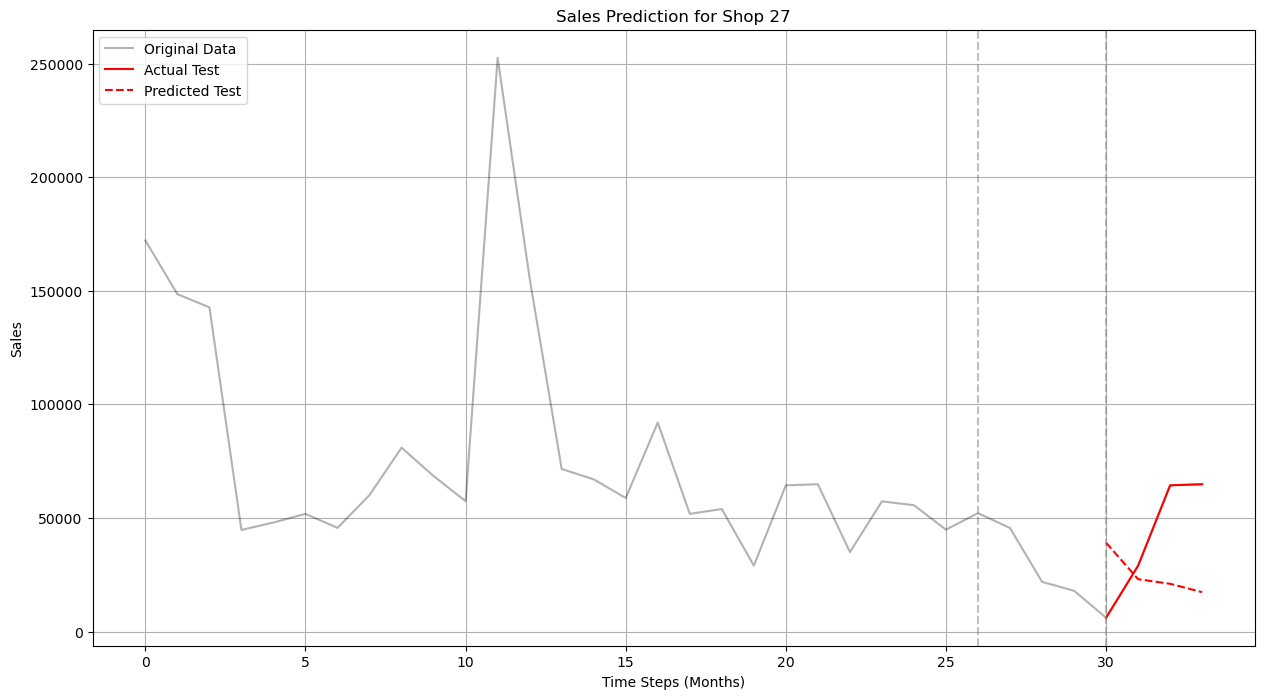


Shop 28:
MSE: 253842689.67
MAE: 13857.61


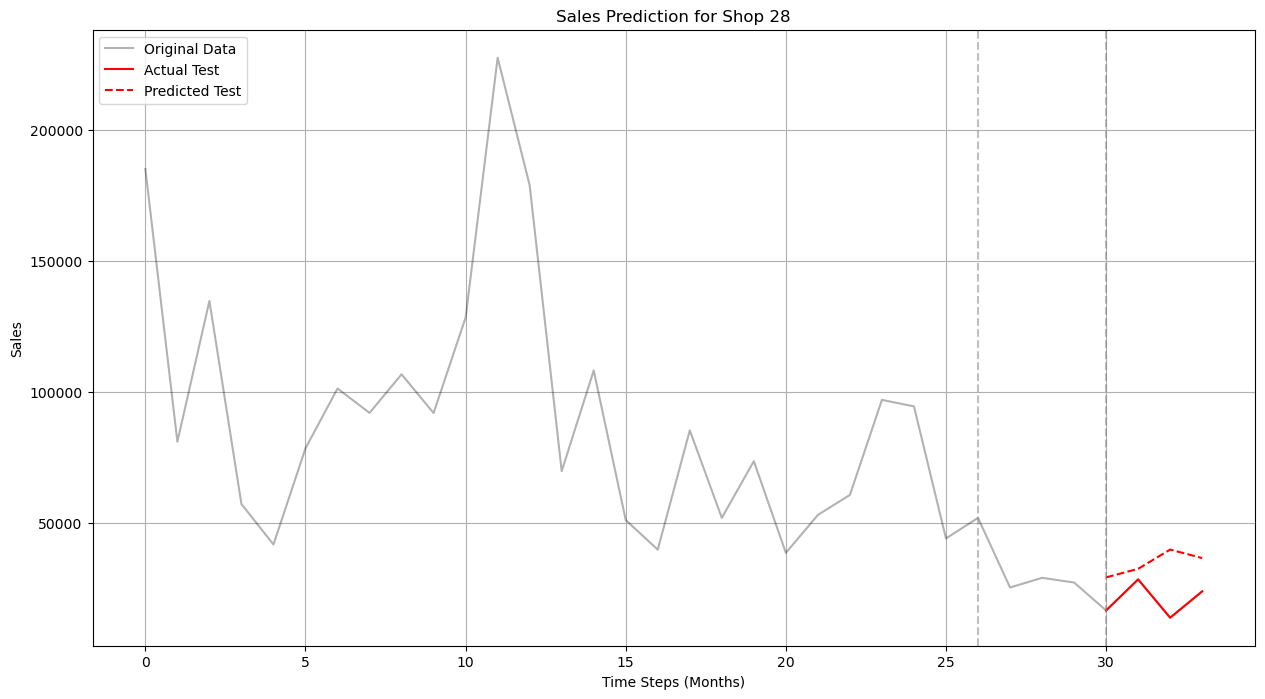


Shop 29:
MSE: 292933282.48
MAE: 15679.91


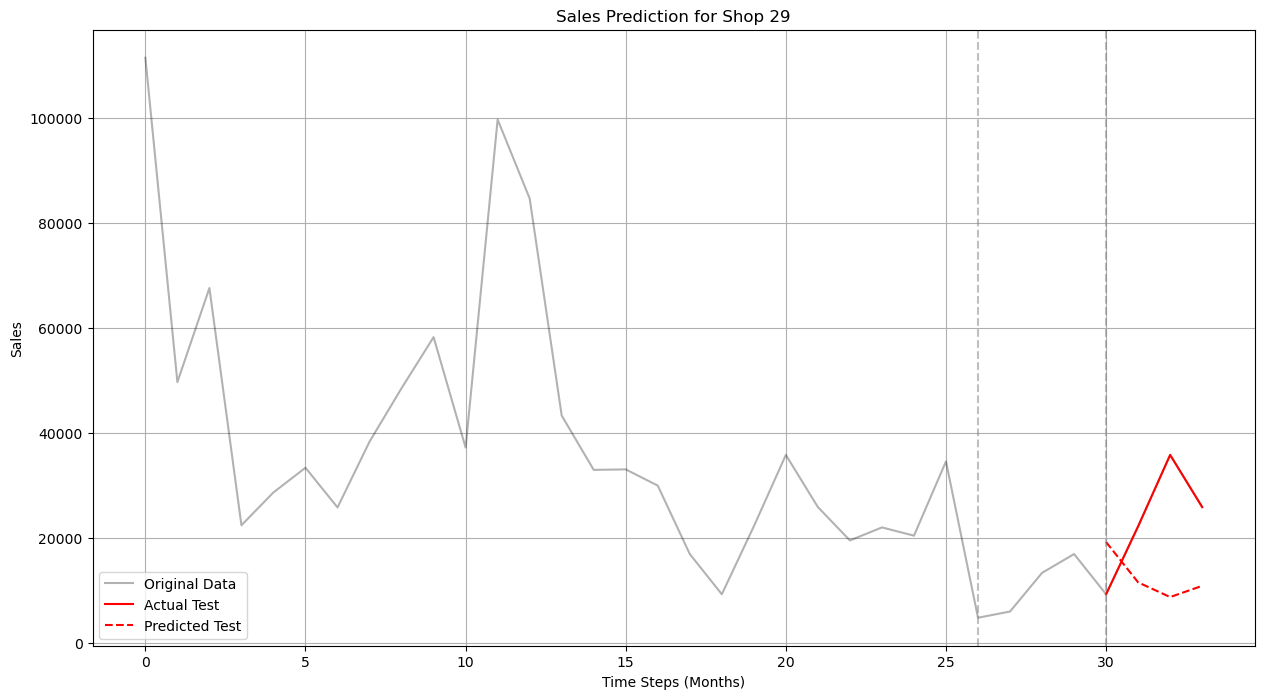


Shop 30:
MSE: 70778785.39
MAE: 7603.13


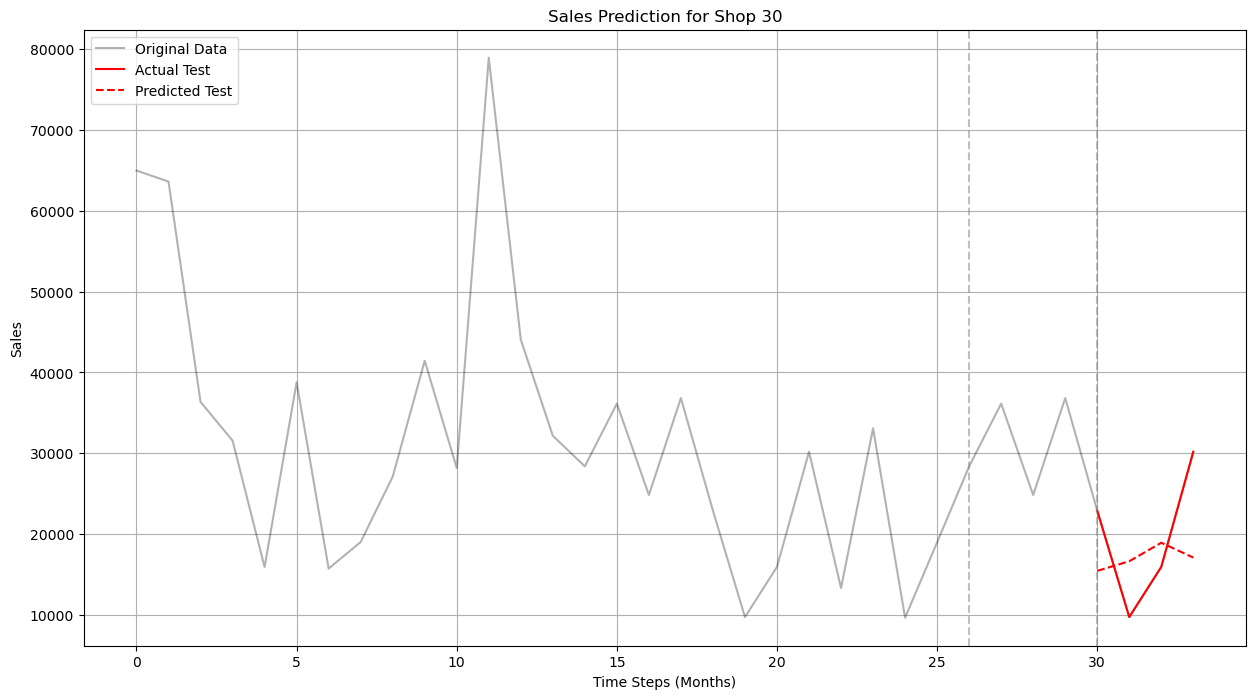


Shop 31:
MSE: 163547296.46
MAE: 9989.89


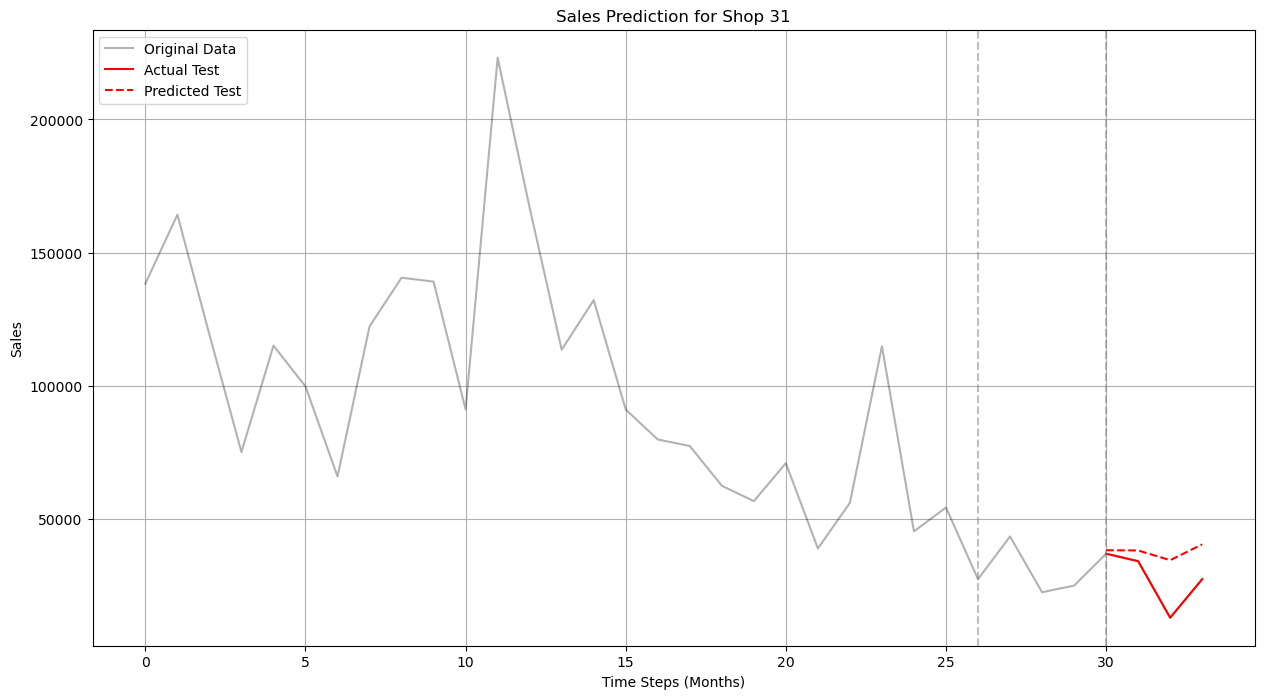


Shop 35:
MSE: 42156556.96
MAE: 5363.32


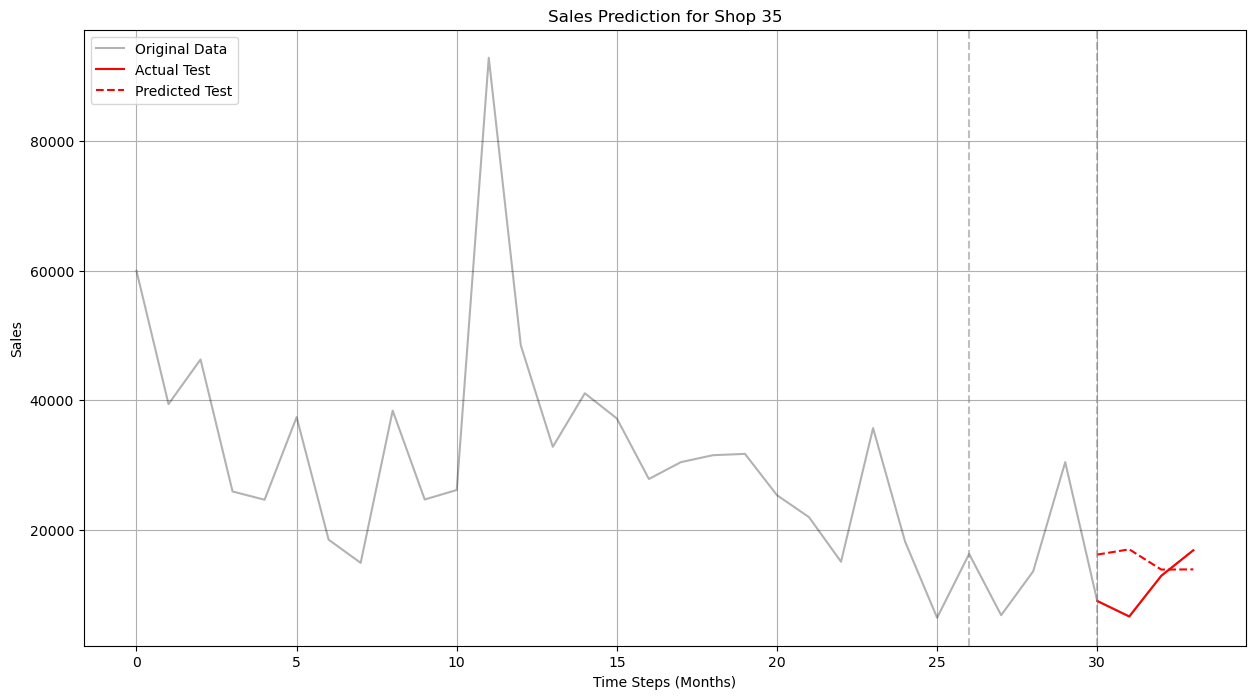


Shop 37:
MSE: 9302793.14
MAE: 2489.29


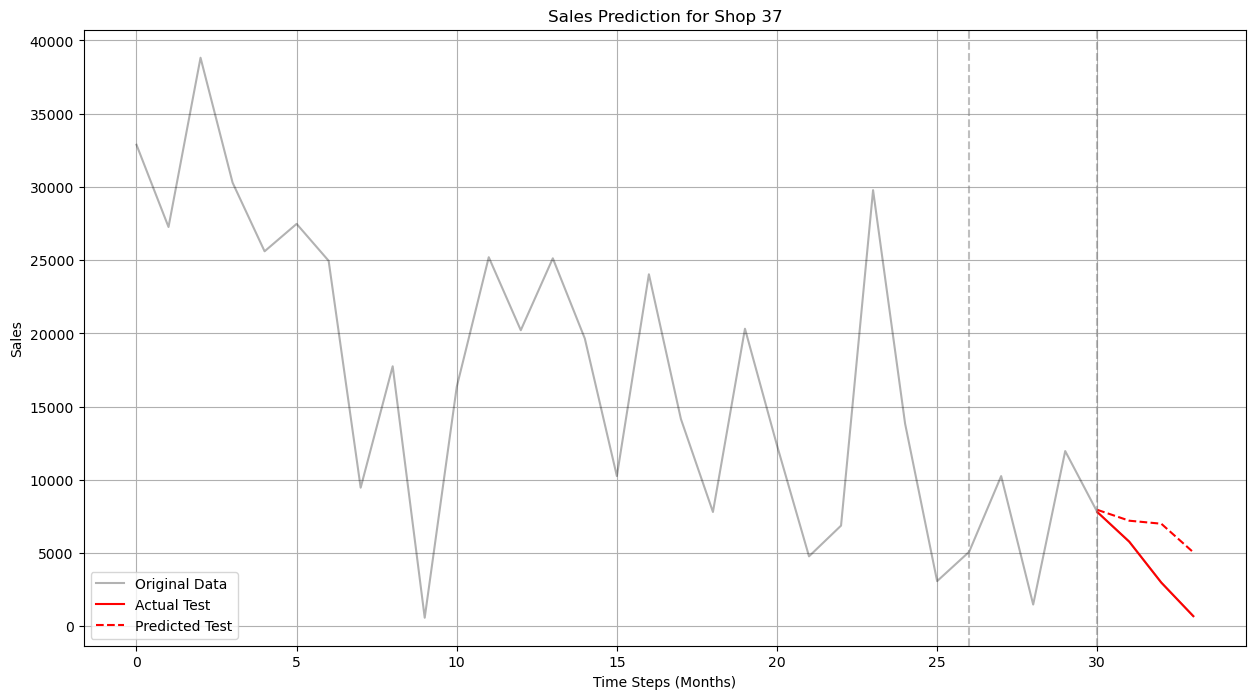


Shop 38:
MSE: 11509593.62
MAE: 1935.48


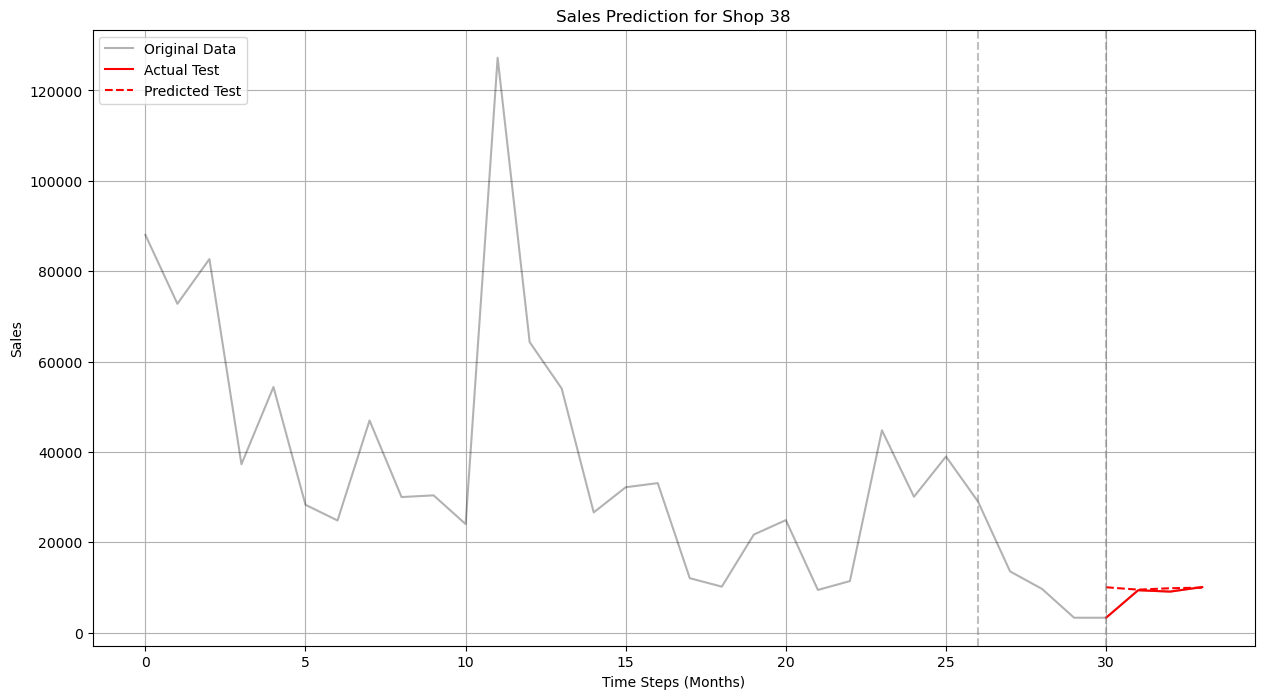


Shop 39:
MSE: 4220148.51
MAE: 1826.07


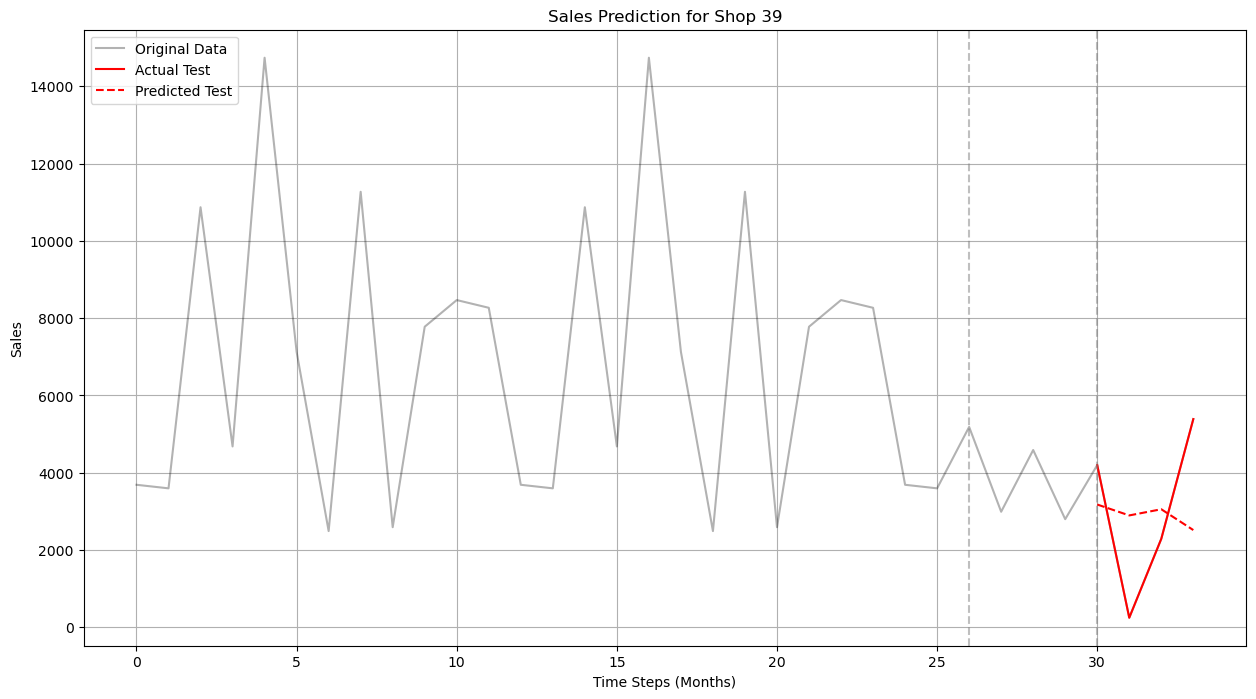


Shop 41:
MSE: 4867923.30
MAE: 1919.58


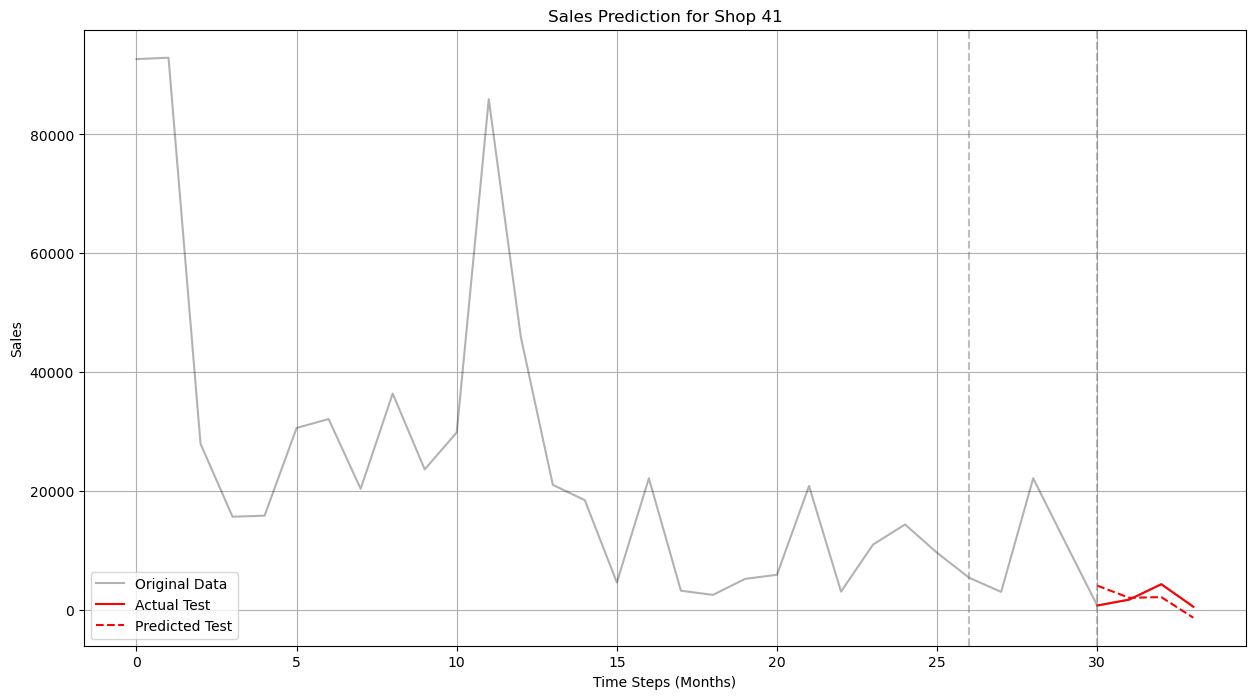


Shop 42:
MSE: 35700398.33
MAE: 5928.37


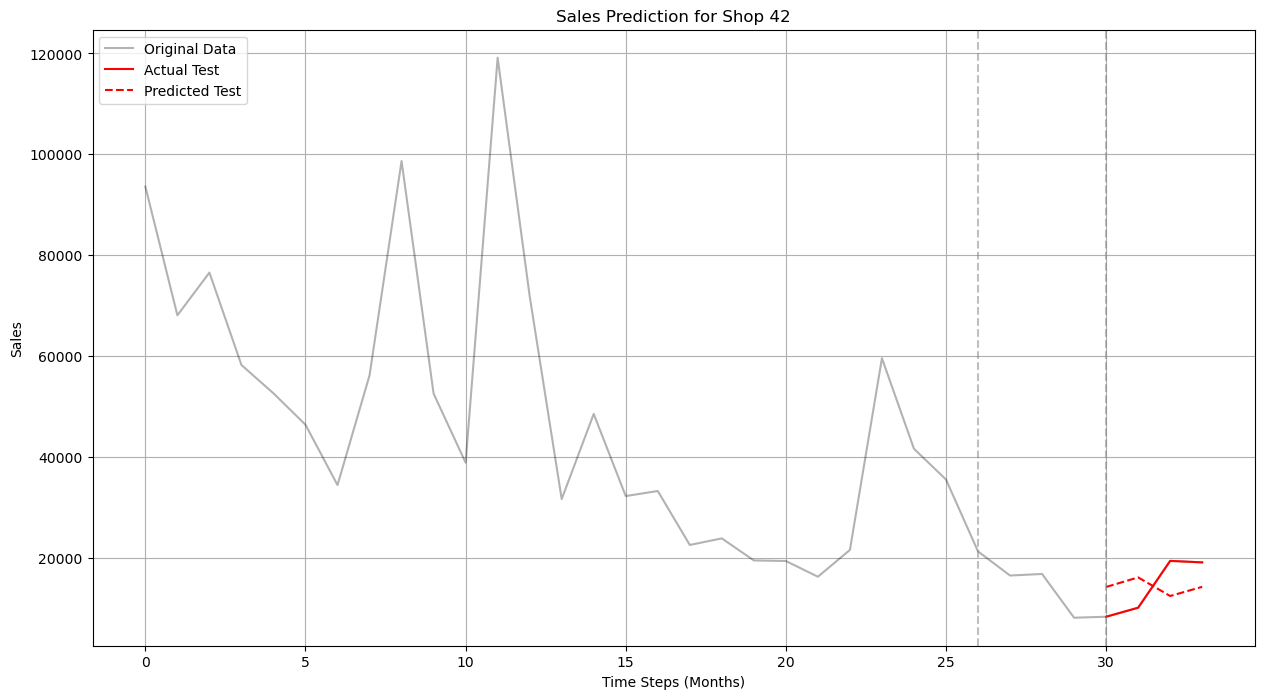


Shop 43:
MSE: 11671236.41
MAE: 2864.34


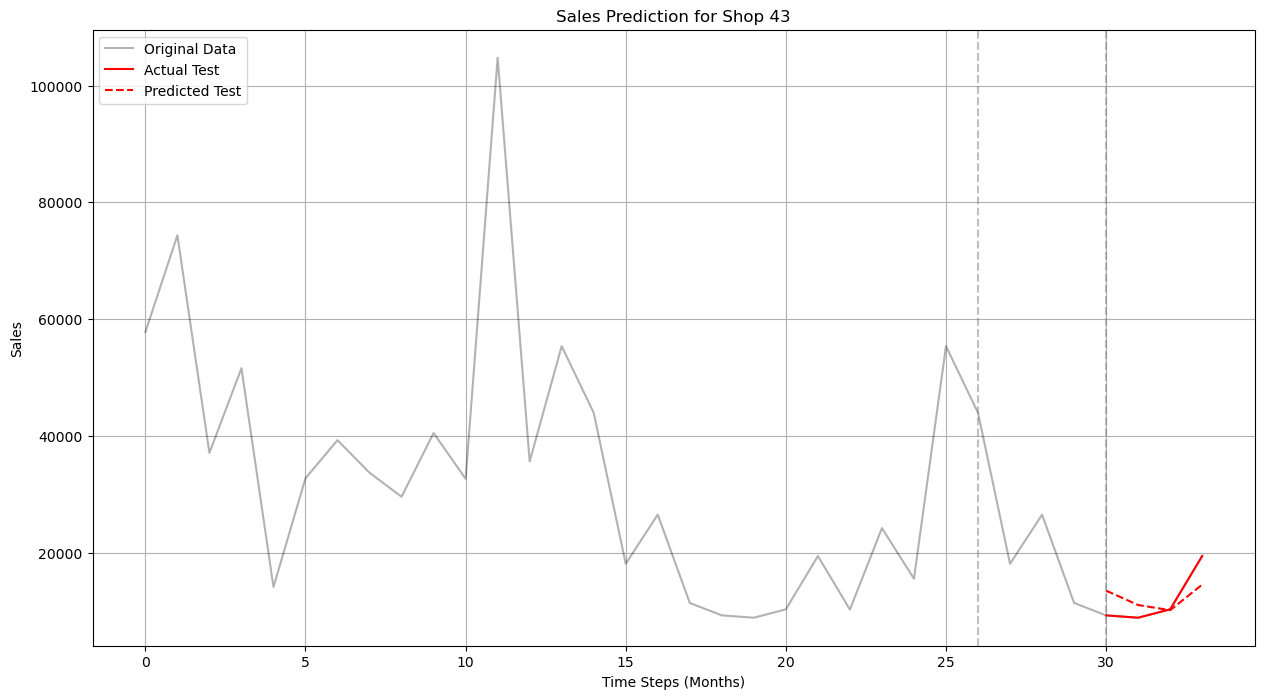


Shop 44:
MSE: 19269731.90
MAE: 3531.17


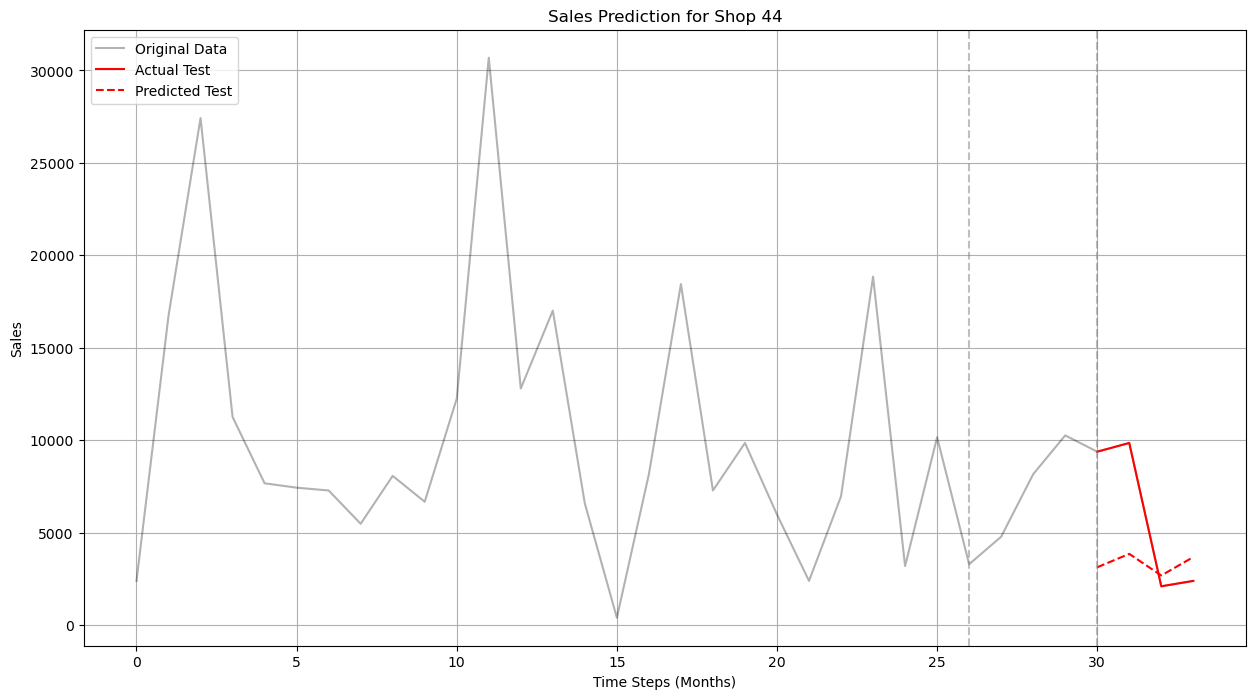


Shop 45:
MSE: 3380829.57
MAE: 1382.41


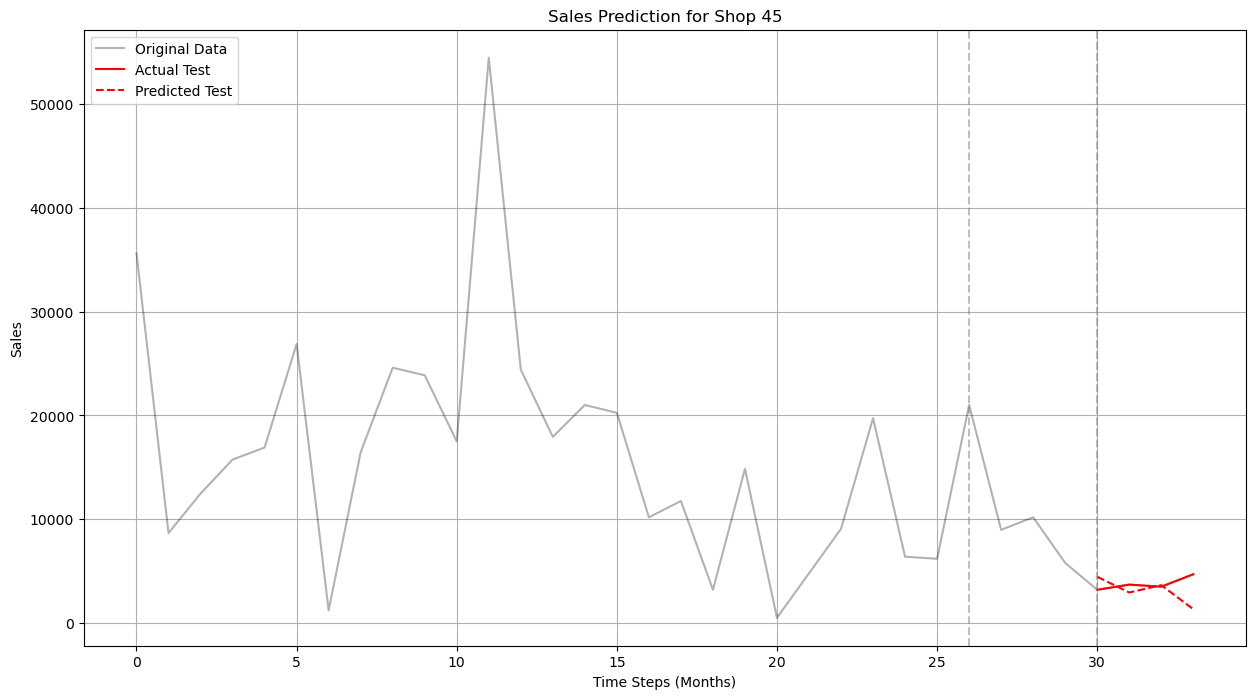


Shop 46:
MSE: 188285879.09
MAE: 11213.46


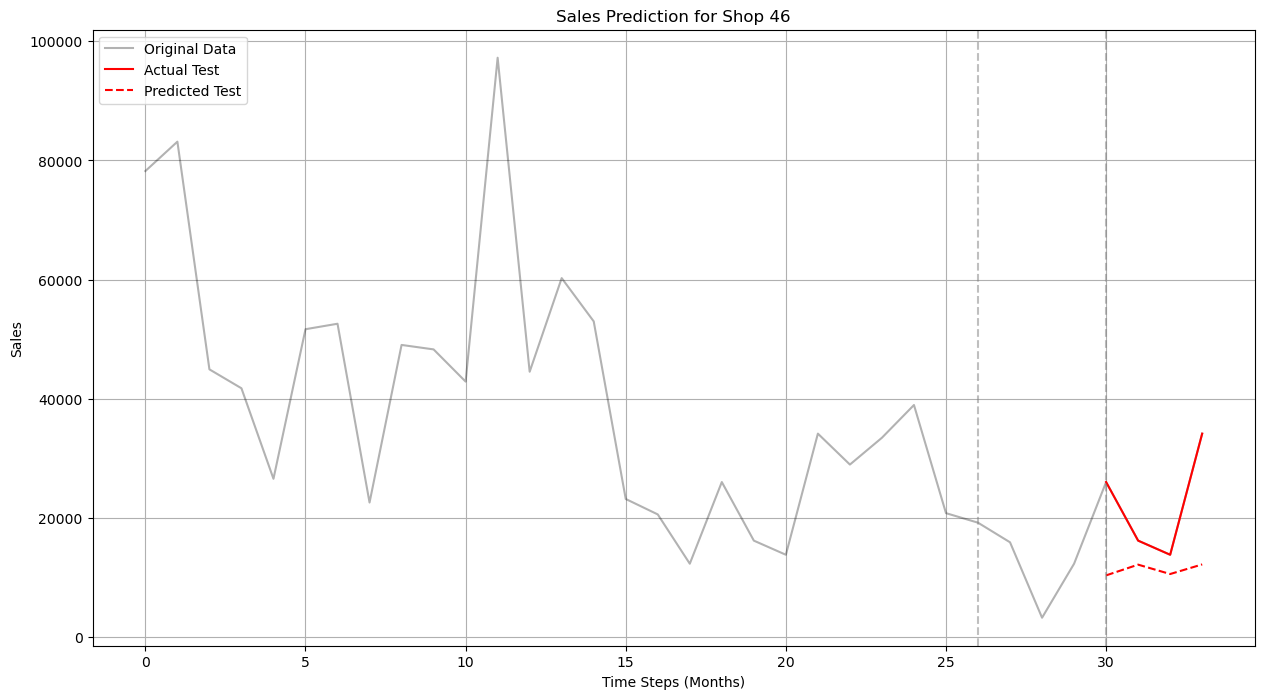


Shop 47:
MSE: 112533218.75
MAE: 7593.07


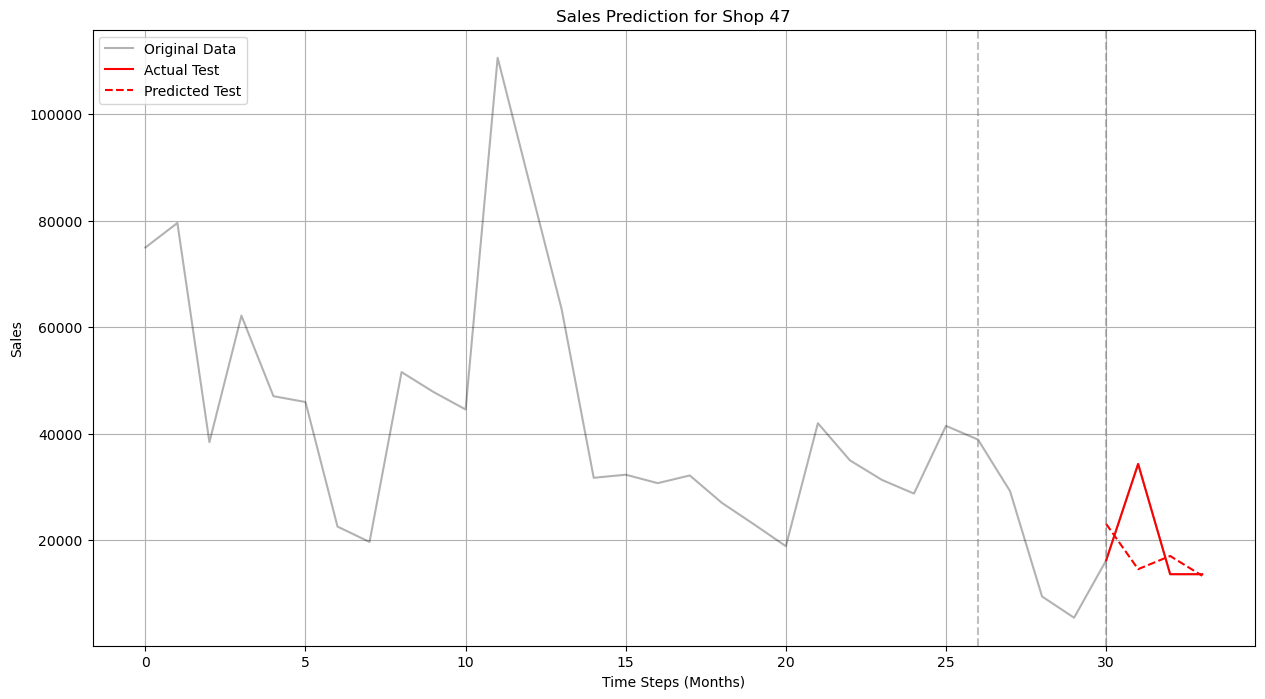


Shop 48:
MSE: 36257605.86
MAE: 5334.92


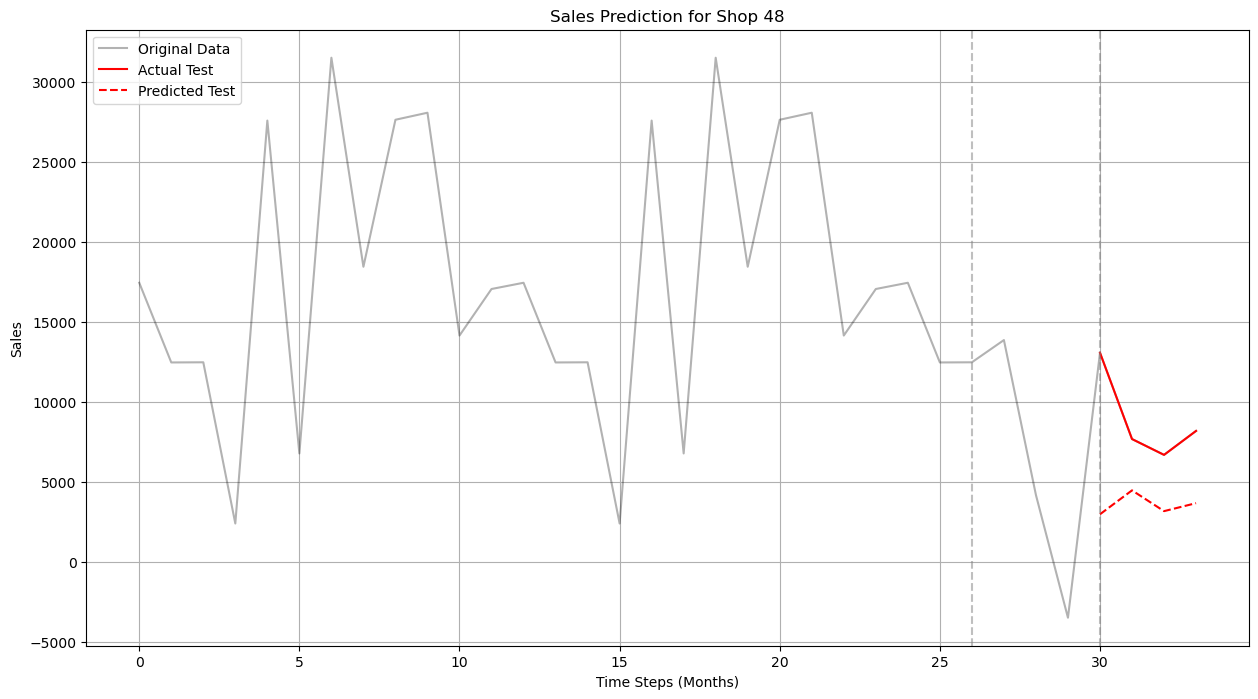


Shop 49:
MSE: 6966975.92
MAE: 2449.26


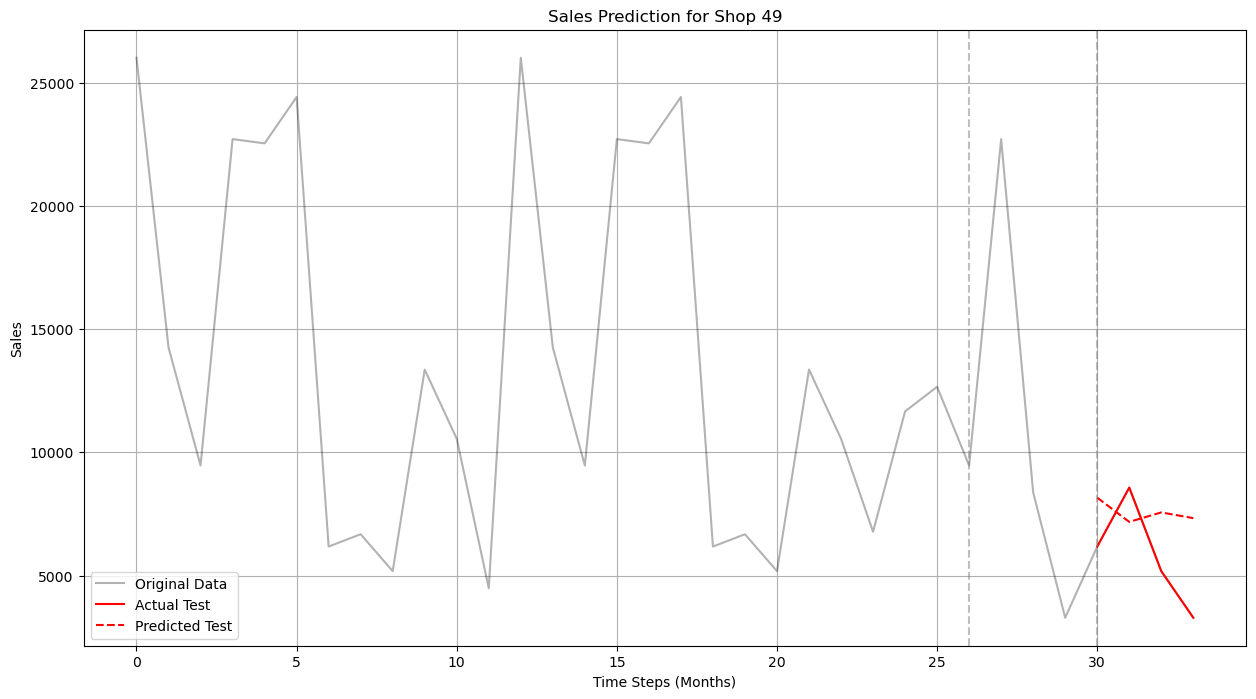


Shop 50:
MSE: 89136432.01
MAE: 8075.10


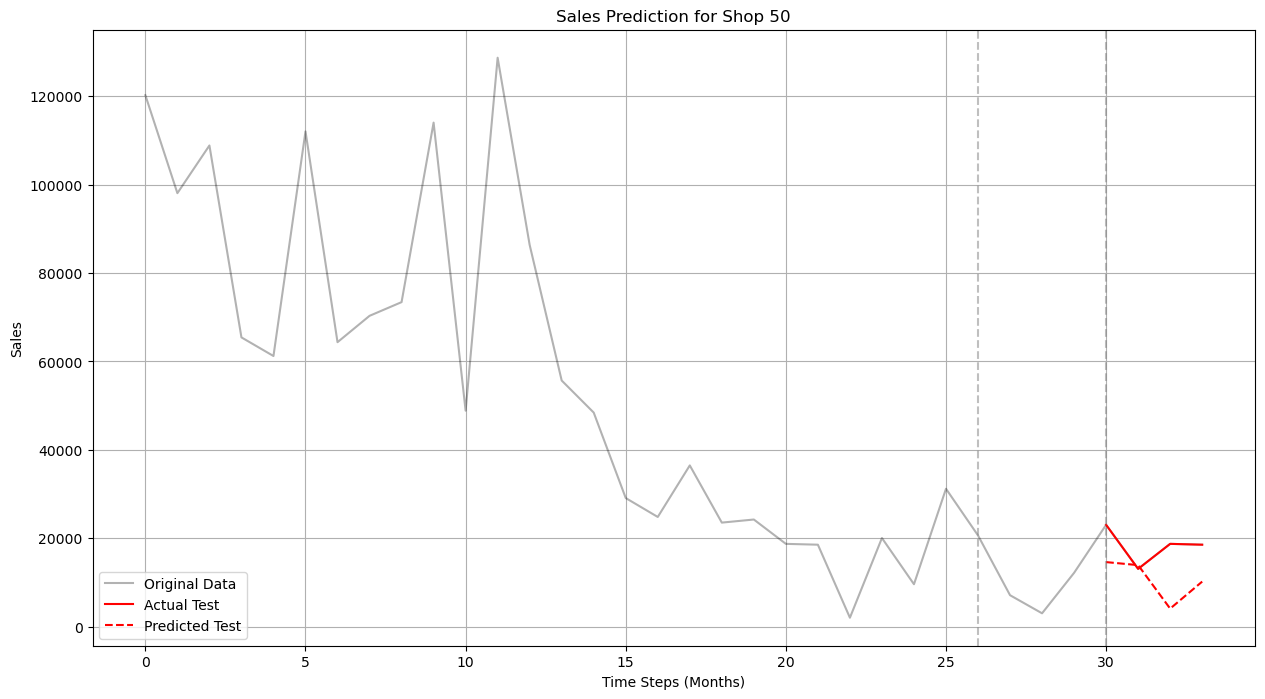


Shop 51:
MSE: 11204450.15
MAE: 2154.38


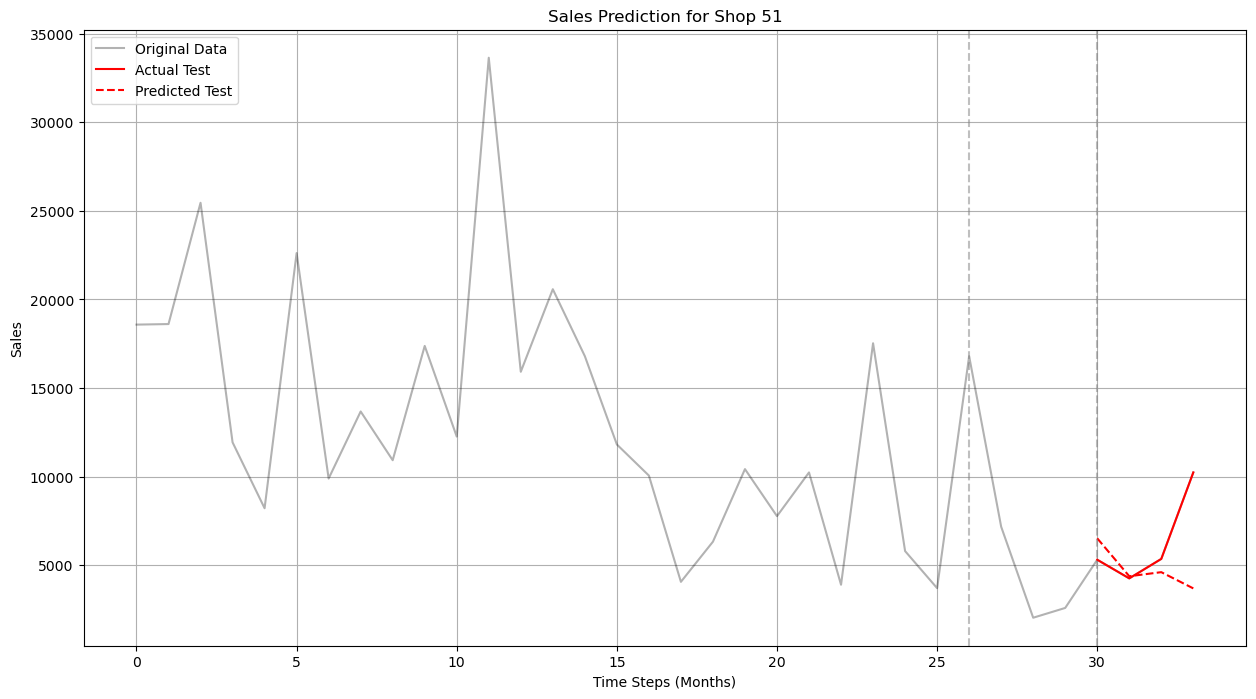


Shop 52:
MSE: 10879293.25
MAE: 2709.05


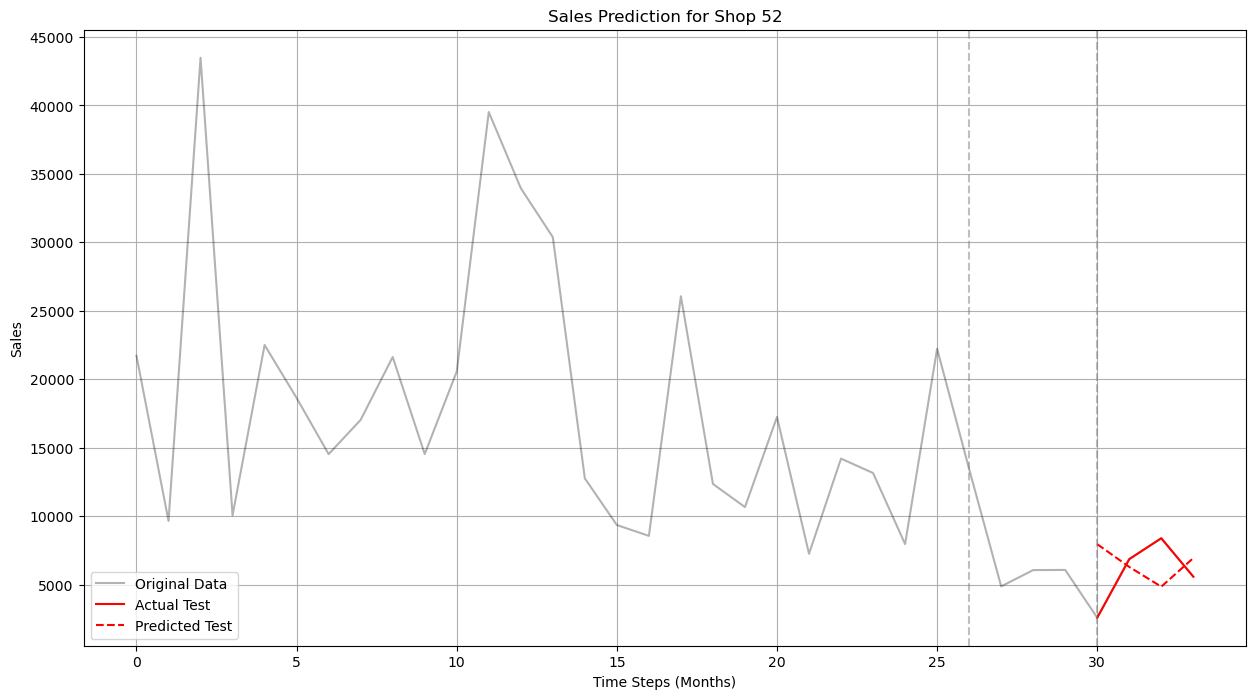


Shop 53:
MSE: 18900385.18
MAE: 2977.19


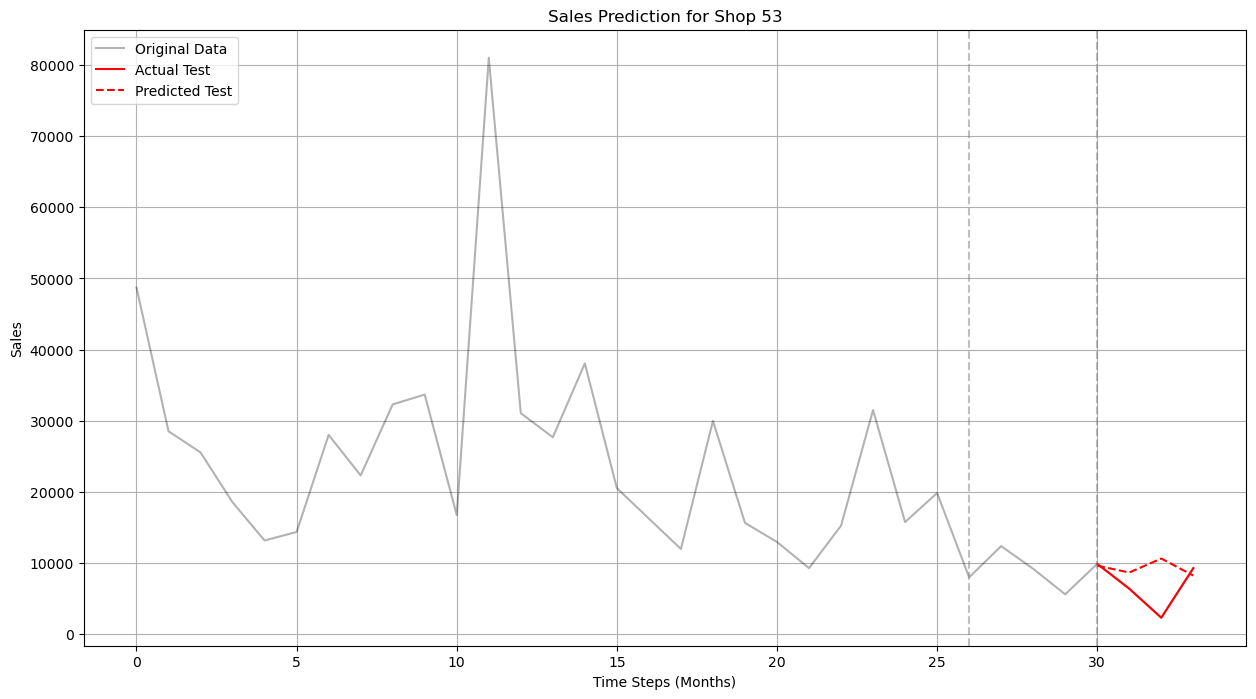


Shop 54:
MSE: 265982099.99
MAE: 13921.18


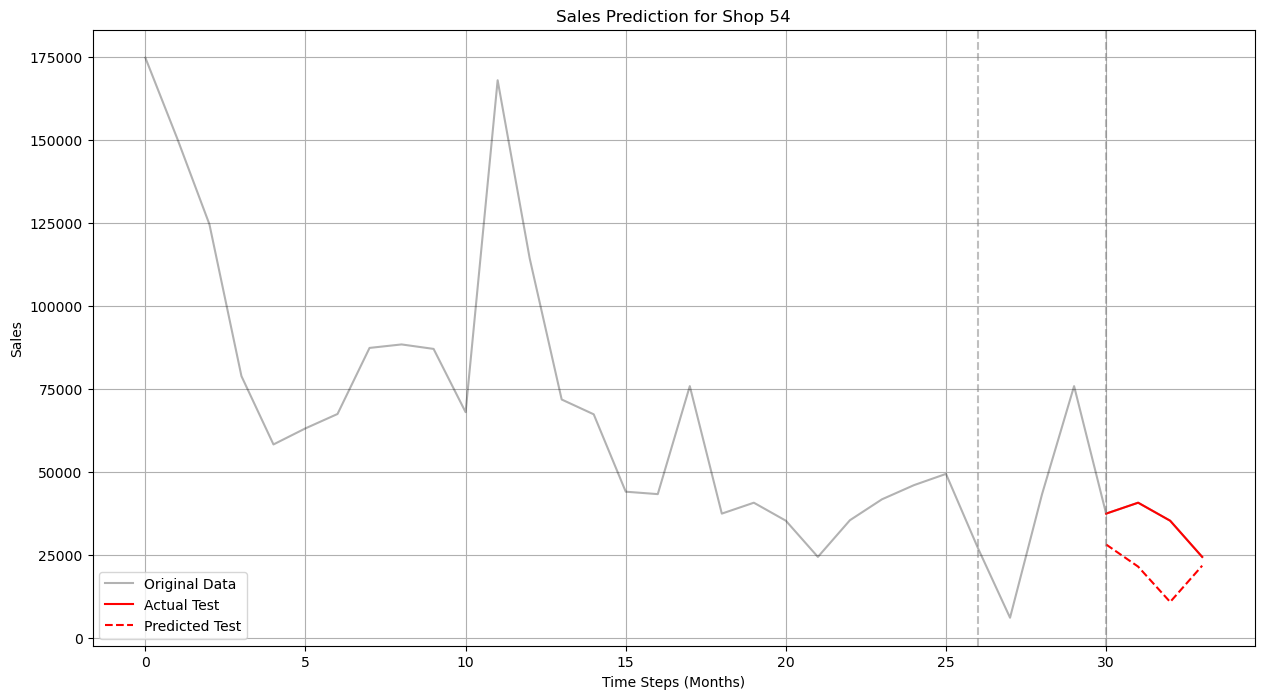


Shop 56:
MSE: 15328981.66
MAE: 3452.30


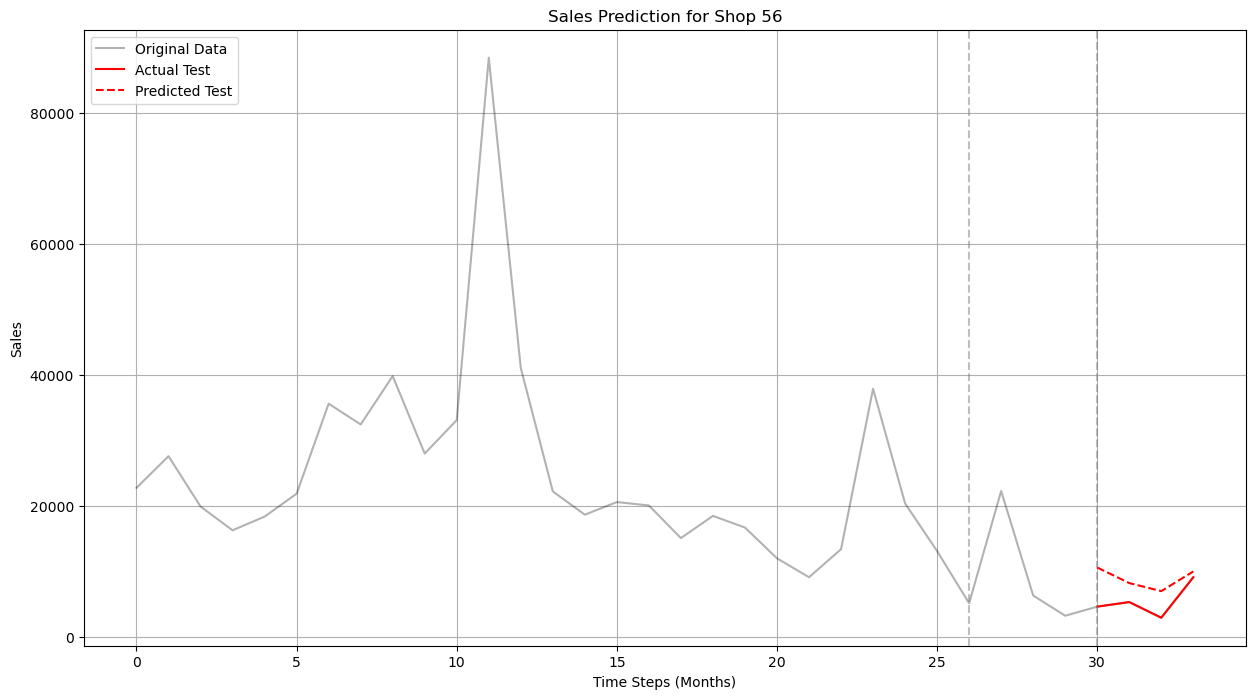


Shop 57:
MSE: 41869358.66
MAE: 4757.82


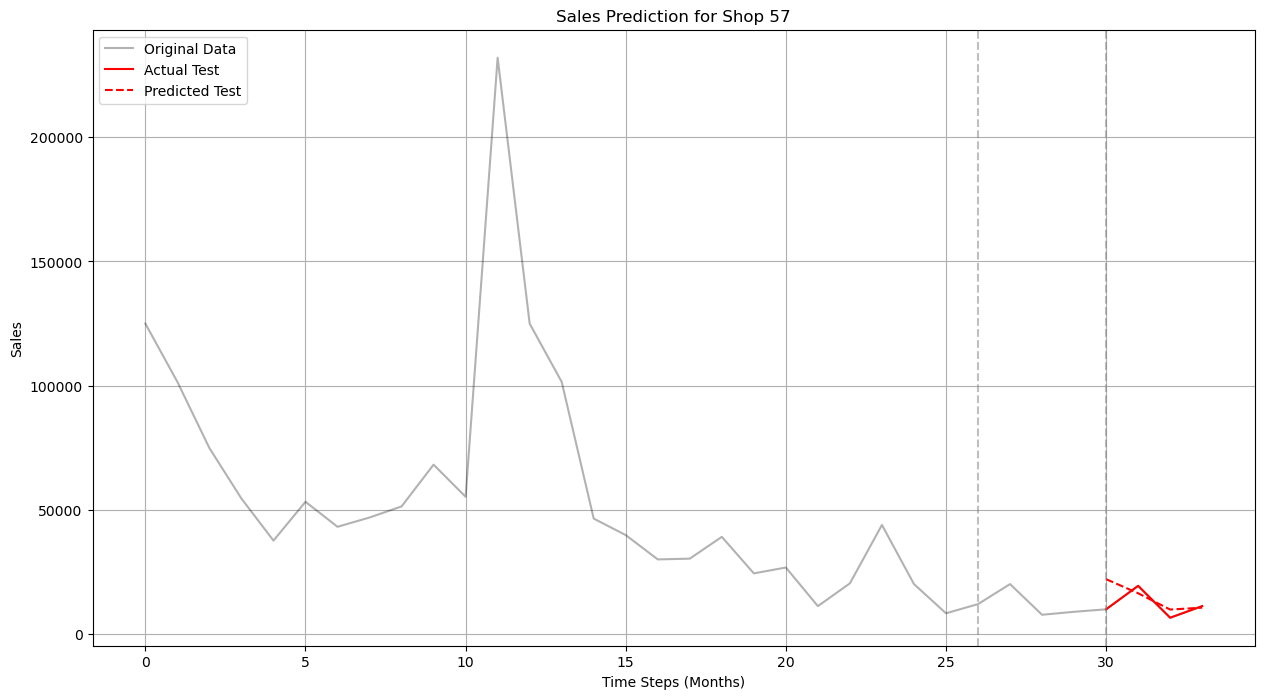


Shop 58:
MSE: 7964713.41
MAE: 1886.31


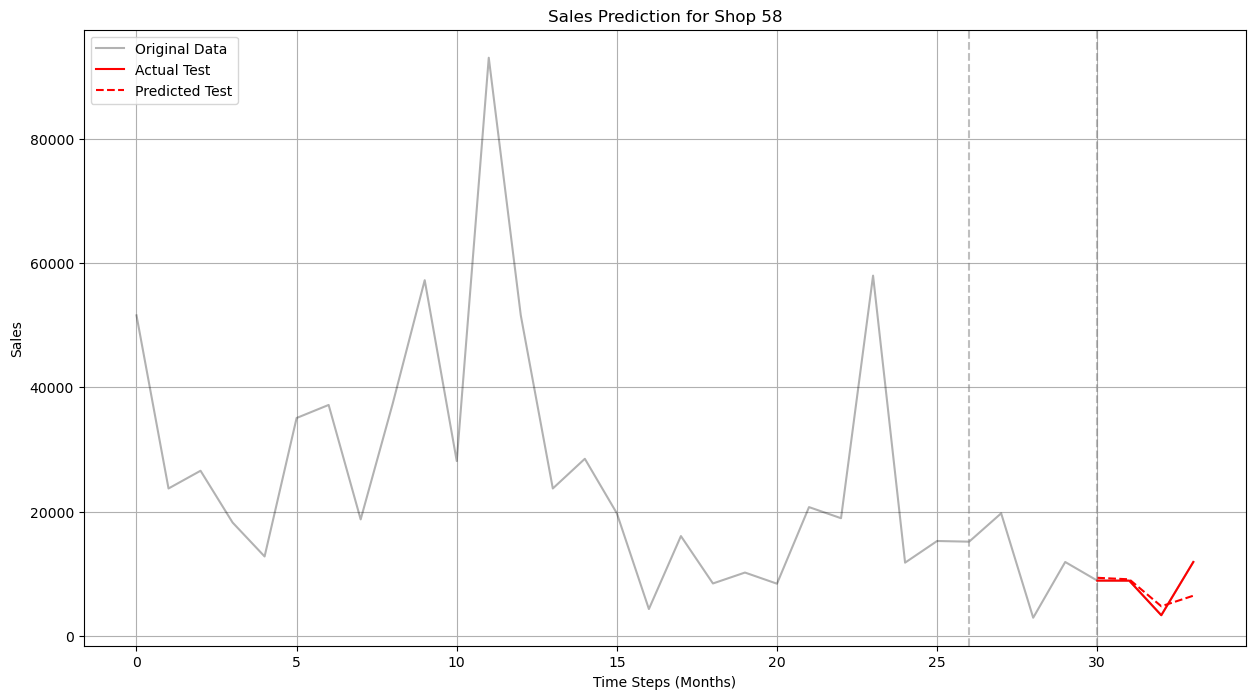


Shop 59:
MSE: 59650019.91
MAE: 4684.26


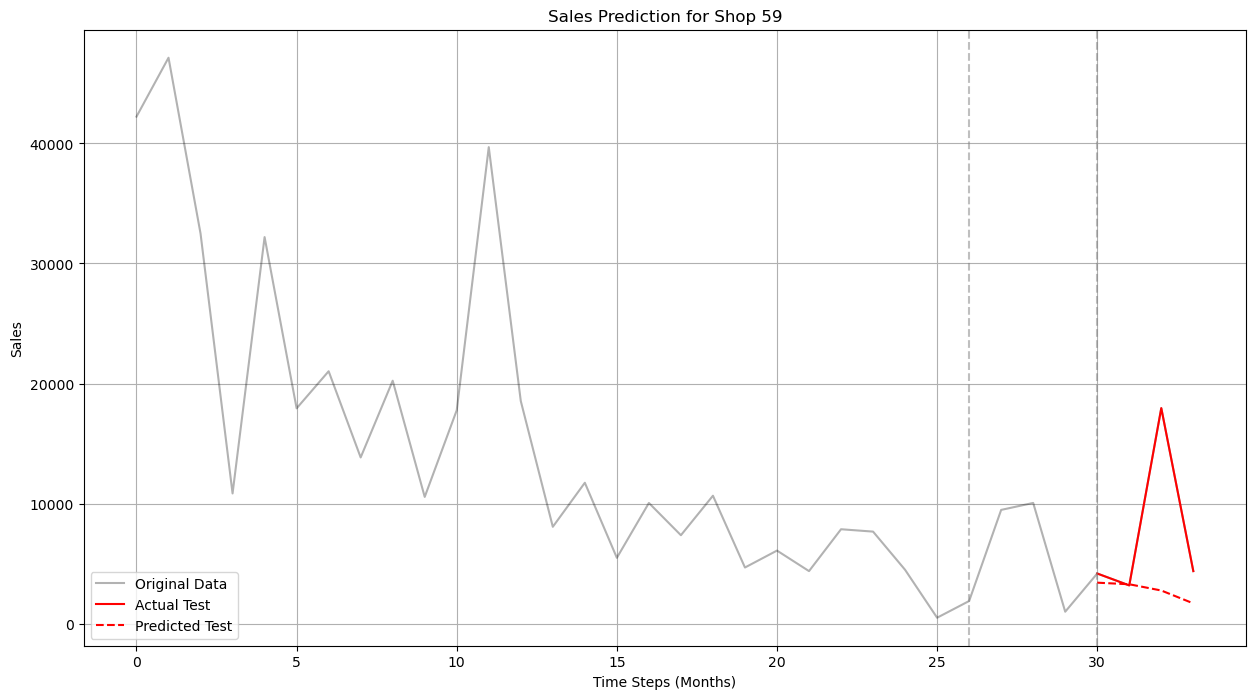


Overall Test Results:
MSE: 84762515.60
MAE: 6053.91
SMAPE: 58.35%


In [21]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

import random
class TimeSeriesDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = sequences
        self.targets = targets
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.targets[idx]

def create_sequences(data, seq_length, pred_length):

    sequences = []
    targets = []
    
    for i in range(data.shape[1] - seq_length - pred_length + 1):
        seq = data[:, i:(i + seq_length)]
        target = data[:, (i + seq_length):(i + seq_length + pred_length)]
        sequences.append(seq)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

def main():
    # Load data
    df = pd.read_csv('sales_full_bymonth.csv')
    
    # Actual shop IDs
    shop_ids = [2, 3, 4, 5, 6, 7, 10, 12, 14, 15, 16, 17, 18, 19, 21, 22, 
                24, 25, 26, 27, 28, 29, 30, 31, 35, 37, 38, 39, 41, 42, 43, 
                44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59]
    
    # Parameters
    seq_length = 12
    pred_length = 4
    batch_size = 32
    num_epochs = 100
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    num_shops = len(shop_ids)
    sales_matrix = np.zeros((num_shops, 34))
    
    for idx, shop_id in enumerate(shop_ids):
        shop_data = df[df['shop_id'] == shop_id]['item_sales_month'].values
        sales_matrix[idx, :] = shop_data
    
    print("Sales matrix shape:", sales_matrix.shape)
    
    scaler = MinMaxScaler()
    sales_matrix_scaled = scaler.fit_transform(sales_matrix.T).T
    
    train_data = sales_matrix_scaled[:, :26]  # 0-26
    val_data = sales_matrix_scaled[:, 26:30]  # 27-30
    test_data = sales_matrix_scaled[:, 30:]   # 31-33
    
    print("Train data shape:", train_data.shape)
    print("Val data shape:", val_data.shape)
    print("Test data shape:", test_data.shape)
    
    train_sequences, train_targets = create_sequences(train_data, seq_length, pred_length)
    print("Train sequences shape:", train_sequences.shape)
    print("Train targets shape:", train_targets.shape)
    
    val_history = np.concatenate([train_data[:, -seq_length:], val_data], axis=1)
    print("Val history shape:", val_history.shape)
    val_sequences, val_targets = create_sequences(val_history, seq_length, pred_length)
    print("Val sequences shape:", val_sequences.shape)
    print("Val targets shape:", val_targets.shape)
    
    test_history = np.concatenate([val_data[:, -seq_length:], test_data], axis=1)
    print("Test history shape:", test_history.shape)
    
    test_sequences = test_history[:, :seq_length]  
    print("Test sequences before reshape:", test_sequences.shape)
    test_sequences = np.expand_dims(test_sequences, axis=0)  
    print("Test sequences after reshape:", test_sequences.shape)
    
    train_dataset = TimeSeriesDataset(
        torch.FloatTensor(train_sequences),
        torch.FloatTensor(train_targets)
    )
    val_dataset = TimeSeriesDataset(
        torch.FloatTensor(val_sequences),
        torch.FloatTensor(val_targets)
    )    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    num_channels = [32, 64, 128, 256]
    model = CNNPredictor(
        num_shops=num_shops,
        seq_length=seq_length,
        pred_length=pred_length
    ).to(device)
    
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    best_val_loss = float('inf')
    patience = 5
    counter = 0
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        for sequences, targets in train_loader:
            sequences = sequences.to(device)
            targets = targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(sequences)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            total_train_loss += loss.item()
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for sequences, targets in val_loader:
                sequences = sequences.to(device)
                targets = targets.to(device)
                
                outputs = model(sequences)
                loss = criterion(outputs, targets)
                total_val_loss += loss.item()
        
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Training Loss: {avg_train_loss:.4f}')
        print(f'Validation Loss: {avg_val_loss:.4f}')
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            torch.save(model.state_dict(), 'cnn_model.pth')
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered")
                break
    
    model.load_state_dict(torch.load('cnn_model.pth'))
    model.eval()
    
    with torch.no_grad():
        test_sequences_tensor = torch.FloatTensor(test_sequences).to(device)
        test_predictions = model(test_sequences_tensor)
        test_predictions = test_predictions.cpu().numpy().squeeze()
    
    test_predictions_original = scaler.inverse_transform(test_predictions.T).T
    test_actual_original = scaler.inverse_transform(test_data.T).T
    
    print("\nTest Set Results:")
    for i, shop_id in enumerate(shop_ids):
        mse = np.mean((test_actual_original[i] - test_predictions_original[i]) ** 2)
        mae = np.mean(np.abs(test_actual_original[i] - test_predictions_original[i]))
        print(f"\nShop {shop_id}:")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f}")
        
        plt.figure(figsize=(15, 8))
        plt.plot(range(34), sales_matrix[i], 'k-', label='Original Data', alpha=0.3)
        plt.plot(range(30, 34), test_actual_original[i], 'r-', label='Actual Test')
        plt.plot(range(30, 34), test_predictions_original[i], 'r--', label='Predicted Test')
        
        plt.axvline(x=26, color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=30, color='gray', linestyle='--', alpha=0.5)
        
        plt.title(f'Sales Prediction for Shop {shop_id}')
        plt.xlabel('Time Steps (Months)')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    overall_mse = np.mean((test_actual_original - test_predictions_original) ** 2)
    overall_mae = np.mean(np.abs(test_actual_original - test_predictions_original))
    overall_smape = smape(test_actual_original, test_predictions_original)

    print("\nOverall Test Results:")
    print(f"MSE: {overall_mse:.2f}")
    print(f"MAE: {overall_mae:.2f}")
    print(f"SMAPE: {overall_smape:.2f}%")


if __name__ == '__main__':
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    main()